In [ ]:
!pip install fuzzywuzzy[speedup]

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 32.3 MB/s eta 0:00:00


In [ ]:
# Importar las librerias necesarias

import pandas as pd
import numpy as npee
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
import spacy as scy
from google.colab import files
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Respuestas_la_felicidad_de_los_tulue√±os - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv to Respuestas_la_felicidad_de_los_tulue√±os - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv


In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Sep-01-2024_Oct-30-2024_419526534529200.csv to Sep-01-2024_Oct-30-2024_419526534529200.csv


In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Sep-01-2024_Oct-30-2024_2253554688360076.csv to Sep-01-2024_Oct-30-2024_2253554688360076.csv


In [ ]:
data_municipalidad_facebook = pd.read_csv('Sep-01-2024_Oct-30-2024_2253554688360076.csv')

In [ ]:
data_municipalidad_instagram = pd.read_csv('Sep-01-2024_Oct-30-2024_419526534529200.csv')

In [ ]:
data_municipalidad_felicidad_tulue√±os = pd.read_csv('Respuestas_la_felicidad_de_los_tulue√±os - Encuesta_LA_FELICIDAD_DE_LOS_TU.csv')

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Lista de barrios espec√≠ficos a preservar
barrios_especificos = [
    "Ciudad Campestre", "El Retiro", "F√°tima", "Urbanizaci√≥n Lomitas", "El Jazm√≠n", "Miraflores",
    "Panamericano", "La Rivera", "San Benito", "Victoria", "Villa Campestre", "Villa del R√≠o",
    "Alvernia", "C√©spedes", "Entre R√≠os", "Franciscanos", "Nuevo Alvernia", "San Vicente de Pa√∫l",
    "Urbanizaci√≥n Santa Luc√≠a", "Asoagrin", "La Santa Cruz", "Casa Huertas", "El Bosque", "El C√≥ndor I y II",
    "El Dorado", "Estambul", "La Inmaculada", "La Villa", "Las Brisas", "Morales", "Nuevo Morales",
    "Moralito", "Popular", "San Antonio", "Santa Rita del R√≠o", "Urbanizaci√≥n Pe√±aranda", "Villanueva",
    "Asociaci√≥n de Vivienda Los Pinos", "Nuevo Morales", "El Centro", "Escobar", "Las Olas", "Palobonito",
    "Tom√°s Uribe Uribe", "Avenida Cali", "Conjunto Residencial Lusitania", "Doce de Octubre", "El Lago",
    "El Laguito", "El Pr√≠ncipe", "Nuevo Pr√≠ncipe", "Principito", "La Bastilla", "La Merced", "Las Acacias",
    "Lusitania", "Sajonia", "Salesiano", "San Carlos", "Quintas de San Felipe", "Bol√≠var", "Playas",
    "Marand√∫a", "Pueblo Nuevo", "Asoagrin - Farf√°n", "La Ceiba", "La Esperanza", "Comuneros",
    "Coraz√≥n del Valle", "Buenos Aires", "Primero de Mayo", "Las Delicias", "350 A√±os", "El Pinar",
    "Progresar", "San Pedro Claver", "La Herradura", "Ciudad Las Palmas", "Departamental", "El Porvenir",
    "Farf√°n", "La Quinta", "Las Am√©ricas", "Los Tol√∫es", "Rojas", "Diablos Rojos", "El Descanso",
    "El Limonar", "Guayacanes", "Jos√© Antonio Gal√°n", "Juan de Lemus y Aguirre", "La Campi√±a",
    "Las Nieves", "Las Veraneras", "San Marino", "Laureles I y II", "Nuevo Farf√°n", "Los Olmos",
    "Prados del Norte", "Rub√©n Cruz V√©lez", "Villa del Lago", "Villa Liliana", "Villa del Sur",
    "Chiminangos", "Municipal", "Bello Horizonte", "Bosques de Maracaibo", "Comfamiliar",
    "Americana de Vivienda (Diablos Rojos II)", "El Refugio", "Flor de la Campana", "Horizonte",
    "Santa Isabel", "Jorge Eliecer Gait√°n", "La Independencia", "El Limonar", "R√≠o Paila", "San Luis",
    "Santa In√©s de Comfamiliar", "Sintra SanCarlos", "Tercer Milenio", "Alameda I y II", "El Jard√≠n",
    "El Palmar", "La Graciela", "La Trinidad", "Siete de Agosto", "Villa Colombia", "Internacional",
    "Juan XXIII", "El Bosquecito", "Maracaibo", "R√≠o Paila", "Portales del R√≠o", "Sam√°n del Norte",
    "Aguaclara", "La Paz", "El Para√≠so"
]

# Funci√≥n para limpiar y comparar nombres de barrios
def obtener_barrio_mejora(texto):
    if pd.isnull(texto):
        return pd.Series([None, None])

    # Eliminar palabras irrelevantes como "barrio"
    texto = texto.lower().replace("barrio", "").strip()

    # Buscar coincidencia aproximada del barrio
    mejor_coincidencia, score = process.extractOne(texto, barrios_especificos, scorer=fuzz.partial_ratio)

    # Si el puntaje de coincidencia es alto, lo consideramos el barrio, el resto es mejora
    if score > 80:  # Ajustable seg√∫n precisi√≥n deseada
        mejora = texto[len(mejor_coincidencia.lower()):].strip(" ,.-")
        return pd.Series([mejor_coincidencia, mejora])

    # Si no se encuentra coincidencia suficiente, devolvemos el texto en mejora
    return pd.Series([None, texto])

# Aplicar la funci√≥n a la columna original
data_municipalidad_felicidad_tulue√±os[['Barrio', 'Mejora_barrio']] = data_municipalidad_felicidad_tulue√±os['¬øEn que barrio resides y que har√≠as para mejorarlo?'].apply(obtener_barrio_mejora)

# Eliminar filas donde ambas columnas resultantes sean nulas
data_cleaned = data_municipalidad_felicidad_tulue√±os.dropna(subset=['Barrio', 'Mejora_barrio'], how='all')

# Reiniciar el √≠ndice del DataFrame limpio
data_cleaned.reset_index(drop=True, inplace=True)

# Visualizar los primeros resultados para confirmar que todo funciona correctamente
data_cleaned[['Barrio', 'Mejora_barrio']].head()


# Asegurarse de que la columna 'Fecha de nacimiento' est√© en formato datetime en el dataset `data_cleaned`
data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')

# Calcular la edad en funci√≥n de la fecha actual y agregarla al DataFrame
today = datetime.today()
data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)

# Mostrar las primeras filas con la nueva columna de Edad para verificar
data_cleaned[['Fecha de nacimiento', 'Edad']].head()



<ipython-input-22-e2f289b1adc8>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fecha de nacimiento'] = pd.to_datetime(data_cleaned['Fecha de nacimiento'], errors='coerce')
<ipython-input-22-e2f289b1adc8>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Edad'] = data_cleaned['Fecha de nacimiento'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)


Fecha de nacimiento  Edad
0          1976-03-08    48
1          1967-06-05    57
2          1991-01-08    33
3          1997-07-30    27
4          1960-11-16    63

In [ ]:
data_cleaned

Registro Dispositivo Fecha de nacimiento  G√©nero  \
0    2024-10-23 19:00:18       phone          1976-03-08  female   
1    2024-10-23 17:49:21    tel√©fono          1967-06-05    male   
2    2024-10-23 18:15:38    tel√©fono          1991-01-08    male   
3    2024-10-23 18:56:06    tel√©fono          1997-07-30  female   
4    2024-10-23 19:11:36    tel√©fono          1960-11-16  female   
..                   ...         ...                 ...     ...   
105  2024-10-30 07:34:43    tel√©fono          1968-03-13  female   
106  2024-10-30 08:07:54    tel√©fono          1987-06-04  female   
107  2024-10-30 10:12:07    tel√©fono          1965-11-01    male   
108  2024-10-30 13:55:43    tel√©fono          1975-12-10    male   
109  2024-10-30 15:37:15    tel√©fono          1993-09-02  female   

     ¬øQu√© tan satisfecho est√° con su vida actualmente?  \
0                                                  8.0   
1                                                  8.0   
2                                                  8.0   
3                                                  6.0   
4                                                  6.0   
..                                                 ...   
105                                                5.0   
106                                                5.0   
107                                               10.0   
108                                               10.0   
109                                               10.0   

     ¬øHasta qu√© punto siente que las cosas que hace en su vida diaria valen la pena?  \
0                                                 10.0                                 
1                                                  8.0                                 
2                                                 10.0                                 
3                                                  4.0                                 
4                                                 10.0                                 
..                                                 ...                                 
105                                                4.0                                 
106                                                7.0                                 
107                                               10.0                                 
108                                                8.0                                 
109                                               10.0                                 

    <b>Pensando en tu bienestar emocional, ¬øqu√© tan feliz o ansioso(a) te sentiste ayer?</b>  \
0                                                Feliz                                         
1                                                Feliz                                         
2                                                Feliz                                         
3                                          Muy ansioso                                         
4                                                Feliz                                         
..                                                 ...                                         
105                                            Neutral                                         
106                                    Un poco ansioso                                         
107                                            Neutral                                         
108                                              Feliz                                         
109                                              Feliz                                         

    <b>¬øQu√© aspecto cambiar√≠as en Tulu√° para mejorar tu bienestar y el de los dem√°s?</b>  \
0               M√°s oportunidades para ni√±os y j√≥venes                                     
1                                       La inseguridad                             

In [ ]:
data_municipalidad_facebook.shape

(91, 32)

In [ ]:
data_municipalidad_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Identificador de la publicaci√≥n                                91 non-null     int64  
 1   Identificador de la p√°gina                                     91 non-null     int64  
 2   Nombre de la p√°gina                                            91 non-null     object 
 3   T√≠tulo                                                         89 non-null     object 
 4   Descripci√≥n                                                    58 non-null     object 
 5   Duraci√≥n (segundos)                                            91 non-null     int64  
 6   Hora de publicaci√≥n                                            91 non-null     object 
 7   Tipo de subt√≠tulo                                       

In [ ]:
data_municipalidad_instagram.shape

(86, 19)

In [ ]:
data_municipalidad_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identificador de la publicaci√≥n  86 non-null     int64  
 1   Identificador de la cuenta       86 non-null     int64  
 2   Nombre de usuario de la cuenta   86 non-null     object 
 3   Nombre de la cuenta              86 non-null     object 
 4   Descripci√≥n                      86 non-null     object 
 5   Duraci√≥n (segundos)              86 non-null     int64  
 6   Hora de publicaci√≥n              86 non-null     object 
 7   Enlace permanente                86 non-null     object 
 8   Tipo de publicaci√≥n              86 non-null     object 
 9   Comentario sobre los datos       0 non-null      float64
 10  Fecha                            86 non-null     object 
 11  Impresiones                      72 non-null     float64
 12  Alcance            

In [ ]:
# Seleccionar las columnas especificadas que contienen la mayor√≠a de los valores NaN
columns_with_edades = [
    'Reproducciones del p√∫blico principal (M, 25-34)','Identificador de la publicaci√≥n','Descripci√≥n','Reproducciones del p√∫blico principal (F, 25-34)', 'Reproducciones del p√∫blico principal (M, 35-44)',
    'Reproducciones del p√∫blico principal (F, 35-44)','Reproducciones del p√∫blico principal (F, 45-54)', 'Reproducciones del p√∫blico principal (M, 45-54)', 'Reproducciones del p√∫blico principal (F, 55-64)','Reproducciones del p√∫blico principal (M, 55-64)'
]

# Crear un nuevo DataFrame con estas columnas
data_municipalidad_edades_por_publicacion = data_municipalidad_facebook[columns_with_edades]

In [ ]:
# Seleccionar las columnas especificadas que contienen la mayor√≠a de los valores NaN
columns_with_datos_generales = [
    'Descripci√≥n','Identificador de la publicaci√≥n','Reacciones','Tipo de publicaci√≥n','Hora de publicaci√≥n','Impresiones', 'Alcance',
    'Reacciones, comentarios y veces que se comparti√≥','Comentarios', 'Veces que se comparti√≥','Total de clics','Duraci√≥n (segundos)'
]

# Crear un nuevo DataFrame con estas columnas
data_municipalidad_data_vital = data_municipalidad_facebook[columns_with_datos_generales]

In [ ]:
data_municipalidad_data_vital

Descripci√≥n  \
0   ¬°Nuevo servicio de Fisioterapia!üåü             ...   
1   ¬°Mejoramos la conectividad en nuestra zona rur...   
2   üö® ¬°Caen integrantes de ‚ÄúLa Inmaculada‚Äù! üì£\n\nL...   
3                  En vivo con Secretario de Hacienda   
4                                     #ParaSerFelices   
..                                                ...   
86  ¬°Alianzas estrat√©gicas que le apuestan al depo...   
87  ¬°El alcalde Gustavo V√©lez entreg√≥ m√°s de 4000 ...   
88                                                NaN   
89                                    #ParaSerFelices   
90                                                NaN   

    Identificador de la publicaci√≥n  Reacciones Tipo de publicaci√≥n  \
0                   942933341207332          54               Reels   
1                   987852620048737          26               Reels   
2                   987789106721755          41               Reels   
3                  1491161731599174          65             En vivo   
4                  1205766237352219          60             En vivo   
..                              ...         ...                 ...   
86                  949100357257297          38               Reels   
87                  947838750716791         338               Reels   
88                  946359854198014         134               Fotos   
89                  478051311880608         390             En vivo   
90                  944756254358374          53               Fotos   

   Hora de publicaci√≥n  Impresiones  Alcance  \
0     09/02/2024 16:26       1745.0   1454.0   
1     10/30/2024 16:40        547.0    538.0   
2     10/30/2024 14:03        937.0    918.0   
3     10/30/2024 13:02          NaN    546.0   
4     10/30/2024 08:21          NaN    728.0   
..                 ...          ...      ...   
86    09/11/2024 10:40       1343.0   1085.0   
87    09/09/2024 14:04       2929.0   2552.0   
88    09/07/2024 12:52       7135.0   6338.0   
89    09/06/2024 10:02          NaN   3423.0   
90    09/05/2024 07:06       3334.0   3028.0   

    Reacciones, comentarios y veces que se comparti√≥  Comentarios  \
0                                               62.0            1   
1                                               33.0            1   
2                                               58.0            5   
3                                               78.0            9   
4                                               67.0            4   
..                                               ...          ...   
86                                              48.0            2   
87                                             465.0           53   
88                                             170.0            9   
89                                             556.0          120   
90                                              64.0            2   

    Veces que se comparti√≥  Total de clics  Duraci√≥n (segundos)  
0                        7             0.0                   57  
1                        6             0.0                   68  
2                       12             0.0                   67  
3                        4             NaN                 1781  
4                        3             NaN                 3183  
..                     ...             ...                  ...  
86                       8             0.0                   63  
87                      74             0.0                   77  
88                      27          1586.0                    0  
89                      46             NaN                 3034  
90                       9           525.0                    0  

[91 rows x 12 columns]

In [ ]:
# Convertir la columna 'Hora de publicaci√≥n' a tipo datetime, manejar errores con 'coerce'
data_municipalidad_data_vital['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_data_vital['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_municipalidad_data_vital['hora_exacta'] = data_municipalidad_data_vital['Hora de publicaci√≥n'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicaci√≥n'
data_municipalidad_data_vital['Hora de publicaci√≥n'] = data_municipalidad_data_vital['Hora de publicaci√≥n'].dt.strftime('%m/%d/%Y')

# Mostrar el DataFrame resultante
print(data_municipalidad_data_vital)

                                          Descripci√≥n  \
0   ¬°Nuevo servicio de Fisioterapia!üåü             ...   
1   ¬°Mejoramos la conectividad en nuestra zona rur...   
2   üö® ¬°Caen integrantes de ‚ÄúLa Inmaculada‚Äù! üì£\n\nL...   
3                  En vivo con Secretario de Hacienda   
4                                     #ParaSerFelices   
..                                                ...   
86  ¬°Alianzas estrat√©gicas que le apuestan al depo...   
87  ¬°El alcalde Gustavo V√©lez entreg√≥ m√°s de 4000 ...   
88                                                NaN   
89                                    #ParaSerFelices   
90                                                NaN   

    Identificador de la publicaci√≥n  Reacciones Tipo de publicaci√≥n  \
0                   942933341207332          54               Reels   
1                   987852620048737          26               Reels   
2                   987789106721755          41               Reels   
3     

<ipython-input-19-1819a7e73600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_data_vital['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')
<ipython-input-19-1819a7e73600>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['hora_exacta'] = data_municipalidad_data_vital['Hora de publicaci√≥n'].dt.strftime('%H:%M')
<ipython-input-19-1819a7e73600>:8: SettingWithCopyWarning: 


In [ ]:
data_municipalidad_data_vital.describe()

Identificador de la publicaci√≥n  Reacciones   Impresiones  \
count                     9.100000e+01   91.000000     75.000000   
mean                      1.010893e+15   99.351648   3333.800000   
std                       2.581872e+14  101.096804   4476.501943   
min                       4.780513e+14    0.000000     49.000000   
25%                       9.623161e+14   40.000000   1047.500000   
50%                       9.709464e+14   59.000000   1605.000000   
75%                       9.846358e+14  121.000000   4331.500000   
max                       2.467838e+15  457.000000  31631.000000   

            Alcance  Reacciones, comentarios y veces que se comparti√≥  \
count     90.000000                                         90.000000   
mean    2949.255556                                        135.100000   
std     3950.941906                                        136.791981   
min       48.000000                                         13.000000   
25%      956.000000                                         53.750000   
50%     1460.000000                                         79.000000   
75%     3435.000000                                        158.750000   
max    30086.000000                                        601.000000   

       Comentarios  Veces que se comparti√≥  Total de clics  \
count    91.000000               91.000000       76.000000   
mean     15.978022               18.285714      469.039474   
std      26.614941               18.438658     1276.896638   
min       0.000000                0.000000        0.000000   
25%       2.000000                8.500000        0.000000   
50%       6.000000               12.000000        0.000000   
75%      14.500000               19.500000      215.500000   
max     142.000000               92.000000     8912.000000   

       Duraci√≥n (segundos)  
count            91.000000  
mean            472.296703  
std             998.067405  
min               0.000000  
25%               0.000000  
50%              52.000000  
75%              78.000000  
max            4256.000000

In [ ]:
# prompt: create a new dataset named "numerical_data_municipalidad_facebook" only with the numerical columns in the dataset "data_municipalidad_facebook"

numerical_data_municipalidad_facebook = data_municipalidad_facebook.select_dtypes(include=['int64', 'float64'])


In [ ]:
numerical_data_municipalidad_facebook.columns

Index(['Identificador de la publicaci√≥n', 'Identificador de la p√°gina',
       'Duraci√≥n (segundos)', 'Es una publicaci√≥n cruzada',
       'Es una publicaci√≥n compartida', 'Idiomas', 'Etiquetas personalizadas',
       'Estado de contenido financiado', 'Comentario sobre los datos',
       'Impresiones', 'Alcance',
       'Reacciones, comentarios y veces que se comparti√≥', 'Reacciones',
       'Comentarios', 'Veces que se comparti√≥', 'Total de clics',
       'Consumo de segmentaci√≥n del p√∫blico coincidente (Photo Click)',
       'Clics de otro tipo', 'Clics en el enlace', 'REELS_PLAYS:COUNT',
       'Segundos reproducidos', 'Segundos en promedio reproducidos',
       'Ingresos estimados (USD)', 'Impresiones del anuncio'],
      dtype='object')

In [ ]:
numerical_data_municipalidad_facebook.shape

(91, 24)

<Axes: >

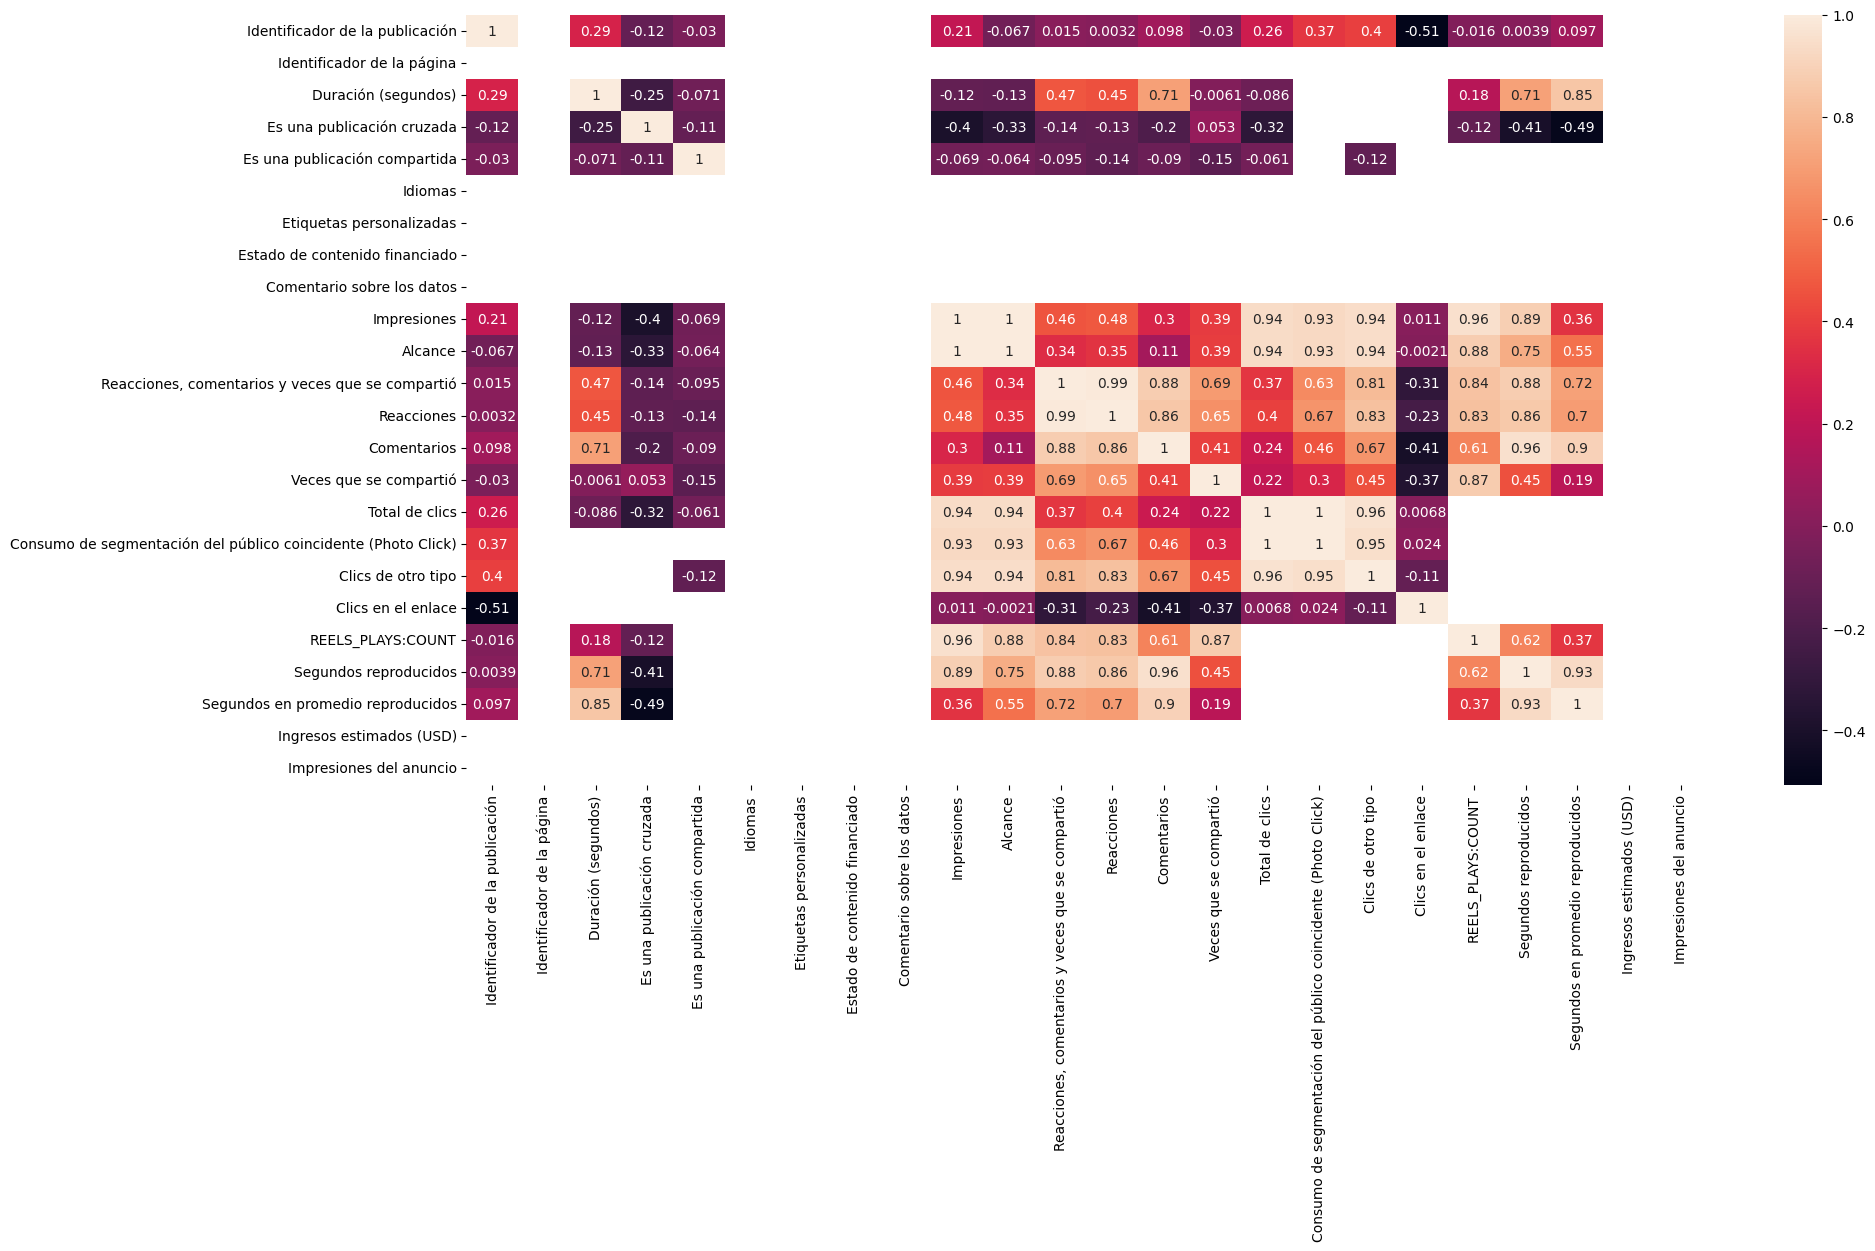

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_data_municipalidad_facebook.corr(),  annot=True)

In [ ]:
# Encuentra el √≠ndice de la fila con el alcance m√°ximo
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√°ximo
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicaci√≥n']

# Imprime el identificador de la publicaci√≥n con el alcance m√°ximo
print("Identificador de la publicaci√≥n con mayor alcance:", id_publicacion_alcance_maximo)

# Encuentra el √≠ndice de la fila con el alcance m√°ximo
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√°ximo
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicaci√≥n']

# Encuentra la descripci√≥n correspondiente a ese identificador de publicaci√≥n
descripcion_alcance_maximo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicaci√≥n'] == id_publicacion_alcance_maximo, 'Descripci√≥n'].values[0]

# Imprime la descripci√≥n correspondiente al ID con mayor alcance
print("Descripci√≥n de la publicaci√≥n con mayor alcance (ID:", id_publicacion_alcance_maximo, "):", descripcion_alcance_maximo)

Identificador de la publicaci√≥n con mayor alcance: 984736253693707
Descripci√≥n de la publicaci√≥n con mayor alcance (ID: 984736253693707 ): nan


In [ ]:
import pandas as pd

# Encuentra el √≠ndice de la fila con el alcance m√°ximo (primera publicaci√≥n con mayor alcance)
indice_alcance_maximo = data_municipalidad_facebook['Alcance'].idxmax()

# Obt√©n el identificador de la primera publicaci√≥n con mayor alcance
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicaci√≥n']

# Excluye la fila correspondiente a la publicaci√≥n con el alcance m√°ximo actual
data_excluyendo_maximo = data_municipalidad_facebook.drop(index=indice_alcance_maximo)

# Encuentra el √≠ndice de la fila con el alcance m√°ximo en el DataFrame restante (segunda publicaci√≥n con mayor alcance)
indice_segundo_alcance_maximo = data_excluyendo_maximo['Alcance'].idxmax()

# Obt√©n el identificador de la segunda publicaci√≥n con mayor alcance
id_segundo_publicacion_alcance_maximo = data_excluyendo_maximo.loc[indice_segundo_alcance_maximo, 'Identificador de la publicaci√≥n']

# Encuentra la descripci√≥n correspondiente a la segunda publicaci√≥n con mayor alcance
descripcion_segundo_alcance_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicaci√≥n'] == id_segundo_publicacion_alcance_maximo, 'Descripci√≥n'].values[0]

# Extrae la fecha de la segunda publicaci√≥n con mayor alcance (desde la columna 'Hora de publicaci√≥n')
fecha_segundo_publicacion_alcance_maximo = pd.to_datetime(data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicaci√≥n'] == id_segundo_publicacion_alcance_maximo, 'Hora de publicaci√≥n']).dt.date.values[0]

# Imprime el identificador, descripci√≥n y fecha de la segunda publicaci√≥n con mayor alcance
print("Identificador de la segunda publicaci√≥n con mayor alcance:", id_segundo_publicacion_alcance_maximo)
print("Descripci√≥n de la segunda publicaci√≥n con mayor alcance:", descripcion_segundo_alcance_maximo)
print("Fecha de la segunda publicaci√≥n con mayor alcance:", fecha_segundo_publicacion_alcance_maximo)


Identificador de la segunda publicaci√≥n con mayor alcance: 984659463701386
Descripci√≥n de la segunda publicaci√≥n con mayor alcance: nan
Fecha de la segunda publicaci√≥n con mayor alcance: 2024-10-26


In [ ]:
import pandas as pd

# Encuentra el √≠ndice de la fila con el alcance m√°ximo (primera publicaci√≥n con mayor alcance)
indice_alcance_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se comparti√≥'].idxmax()

# Obt√©n el identificador de la primera publicaci√≥n con mayor alcance
id_publicacion_alcance_maximo = data_municipalidad_facebook.loc[indice_alcance_maximo, 'Identificador de la publicaci√≥n']

# Excluye la fila correspondiente a la publicaci√≥n con el alcance m√°ximo actual
data_excluyendo_maximo = data_municipalidad_facebook.drop(index=indice_alcance_maximo)

# Encuentra el √≠ndice de la fila con el alcance m√°ximo en el DataFrame restante (segunda publicaci√≥n con mayor alcance)
indice_segundo_alcance_maximo = data_excluyendo_maximo['Reacciones, comentarios y veces que se comparti√≥'].idxmax()

# Obt√©n el identificador de la segunda publicaci√≥n con mayor alcance
id_segundo_publicacion_alcance_maximo = data_excluyendo_maximo.loc[indice_segundo_alcance_maximo, 'Identificador de la publicaci√≥n']

# Encuentra la descripci√≥n correspondiente a la segunda publicaci√≥n con mayor alcance
descripcion_segundo_alcance_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicaci√≥n'] == id_segundo_publicacion_alcance_maximo, 'Descripci√≥n'].values[0]

# Extrae la fecha de la segunda publicaci√≥n con mayor alcance (desde la columna 'Hora de publicaci√≥n')
fecha_segundo_publicacion_alcance_maximo = pd.to_datetime(data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicaci√≥n'] == id_segundo_publicacion_alcance_maximo, 'Hora de publicaci√≥n']).dt.date.values[0]

# Imprime el identificador, descripci√≥n y fecha de la segunda publicaci√≥n con mayor alcance
print("Identificador de la segunda publicaci√≥n con mayores reacciones:", id_segundo_publicacion_alcance_maximo)
print("Descripci√≥n de la segunda publicaci√≥n con mayores reacciones:", descripcion_segundo_alcance_maximo)
print("Fecha de la segunda publicaci√≥n con mayor alcance:", fecha_segundo_publicacion_alcance_maximo)


Identificador de la segunda publicaci√≥n con mayores reacciones: 984933583673974
Descripci√≥n de la segunda publicaci√≥n con mayores reacciones: MUNDO DE LA FANTAS√çA üëª vivimos hoy con todos los ni√±os del CORAZ√ìN DEL VALLE üòçüíô
Fecha de la segunda publicaci√≥n con mayor alcance: 2024-10-26


In [ ]:
# Encuentra el √≠ndice de la fila con el alcance m√°ximo
indice_reacciones_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se comparti√≥'].idxmax()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√°ximo
id_publicacion_reacciones_maximo = data_municipalidad_facebook.loc[indice_reacciones_maximo, 'Identificador de la publicaci√≥n']

# Imprime el identificador de la publicaci√≥n con el alcance m√°ximo
print("Identificador de la publicaci√≥n con mayor alcance:", id_publicacion_reacciones_maximo)

# Encuentra el √≠ndice de la fila con el alcance m√°ximo
indice_reacciones_maximo = data_municipalidad_facebook['Reacciones, comentarios y veces que se comparti√≥'].idxmax()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√°ximo
id_publicacion_reacciones_maximo = data_municipalidad_facebook.loc[indice_reacciones_maximo, 'Identificador de la publicaci√≥n']

# Encuentra la descripci√≥n correspondiente a ese identificador de publicaci√≥n
descripcion_reacciones_maximo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicaci√≥n'] == id_publicacion_reacciones_maximo, 'Descripci√≥n'].values[0]

# Imprime la descripci√≥n correspondiente al ID con mayor alcance
print("Descripci√≥n de la publicaci√≥n con mayores reacciones (ID:", id_publicacion_reacciones_maximo, "):", descripcion_reacciones_maximo)

Identificador de la publicaci√≥n con mayor alcance: 905026751442620
Descripci√≥n de la publicaci√≥n con mayores reacciones (ID: 905026751442620 ): Bienvenidos a este espacio con nuestro alcalde @[100050197852350:2048:Gustavo V√©lez], hoy en compa√±√≠a del periodista Jorge Adri√°n Orozco.  #ParaSerFelices

@[783956240438377:49210:@seguidores] @[815630467270954:49210:@fans destacados]


In [ ]:
import pandas as pd

# Crear una nueva columna que sume las interacciones (Reacciones, Comentarios y Veces que se comparti√≥)
data_municipalidad_data_vital['Interacciones_totales'] = (
    data_municipalidad_data_vital['Reacciones'] +
    data_municipalidad_data_vital['Comentarios'] +
    data_municipalidad_data_vital['Veces que se comparti√≥']
)

# Encuentra el √≠ndice de la primera publicaci√≥n con mayor cantidad de interacciones
indice_interacciones_maximo = data_municipalidad_data_vital['Interacciones_totales'].idxmax()

# Obt√©n el identificador de la primera publicaci√≥n con mayor interacciones
id_publicacion_interacciones_maximo = data_municipalidad_data_vital.loc[indice_interacciones_maximo, 'Identificador de la publicaci√≥n']

# Excluye la fila correspondiente a la publicaci√≥n con mayor interacciones
data_excluyendo_maximo = data_municipalidad_data_vital.drop(index=indice_interacciones_maximo)

# Encuentra el √≠ndice de la segunda publicaci√≥n con mayor interacciones
indice_segundo_interacciones_maximo = data_excluyendo_maximo['Interacciones_totales'].idxmax()

# Obt√©n el identificador de la segunda publicaci√≥n con mayor interacciones
id_segundo_publicacion_interacciones_maximo = data_excluyendo_maximo.loc[indice_segundo_interacciones_maximo, 'Identificador de la publicaci√≥n']

# Excluye la fila correspondiente a la segunda publicaci√≥n con mayor interacciones
data_excluyendo_segundo_maximo = data_excluyendo_maximo.drop(index=indice_segundo_interacciones_maximo)

# Encuentra el √≠ndice de la tercera publicaci√≥n con mayor interacciones
indice_tercer_interacciones_maximo = data_excluyendo_segundo_maximo['Interacciones_totales'].idxmax()

# Obt√©n el identificador de la tercera publicaci√≥n con mayor interacciones
id_tercer_publicacion_interacciones_maximo = data_excluyendo_segundo_maximo.loc[indice_tercer_interacciones_maximo, 'Identificador de la publicaci√≥n']

# Obt√©n las descripciones de las tres publicaciones con mayor interacciones
descripcion_primera_interacciones_maximo = data_municipalidad_data_vital.loc[data_municipalidad_data_vital['Identificador de la publicaci√≥n'] == id_publicacion_interacciones_maximo, 'Descripci√≥n'].values[0]
descripcion_segunda_interacciones_maximo = data_excluyendo_maximo.loc[data_excluyendo_maximo['Identificador de la publicaci√≥n'] == id_segundo_publicacion_interacciones_maximo, 'Descripci√≥n'].values[0]
descripcion_tercera_interacciones_maximo = data_excluyendo_segundo_maximo.loc[data_excluyendo_segundo_maximo['Identificador de la publicaci√≥n'] == id_tercer_publicacion_interacciones_maximo, 'Descripci√≥n'].values[0]

# Imprime los resultados
print("Identificador de la primera publicaci√≥n con mayor interacciones:", id_publicacion_interacciones_maximo)
print("Descripci√≥n de la primera publicaci√≥n con mayor interacciones:", descripcion_primera_interacciones_maximo)

print("Identificador de la segunda publicaci√≥n con mayor interacciones:", id_segundo_publicacion_interacciones_maximo)
print("Descripci√≥n de la segunda publicaci√≥n con mayor interacciones:", descripcion_segunda_interacciones_maximo)

print("Identificador de la tercera publicaci√≥n con mayor interacciones:", id_tercer_publicacion_interacciones_maximo)
print("Descripci√≥n de la tercera publicaci√≥n con mayor interacciones:", descripcion_tercera_interacciones_maximo)


Identificador de la primera publicaci√≥n con mayor interacciones: 905026751442620
Descripci√≥n de la primera publicaci√≥n con mayor interacciones: Bienvenidos a este espacio con nuestro alcalde @[100050197852350:2048:Gustavo V√©lez], hoy en compa√±√≠a del periodista Jorge Adri√°n Orozco.  #ParaSerFelices

@[783956240438377:49210:@seguidores] @[815630467270954:49210:@fans destacados]
Identificador de la segunda publicaci√≥n con mayor interacciones: 984933583673974
Descripci√≥n de la segunda publicaci√≥n con mayor interacciones: MUNDO DE LA FANTAS√çA üëª vivimos hoy con todos los ni√±os del CORAZ√ìN DEL VALLE üòçüíô
Identificador de la tercera publicaci√≥n con mayor interacciones: 478051311880608
Descripci√≥n de la tercera publicaci√≥n con mayor interacciones: #ParaSerFelices


<ipython-input-33-447ea4eaeb56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_data_vital['Interacciones_totales'] = (


In [ ]:
# Encuentra el √≠ndice de la fila con el alcance m√≠nimo
indice_alcance_minimo = data_municipalidad_facebook['Alcance'].idxmin()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√≠nimo
id_publicacion_alcance_minimo = data_municipalidad_facebook.loc[indice_alcance_minimo, 'Identificador de la publicaci√≥n']

# Imprime el identificador de la publicaci√≥n con menor alcance
print("Identificador de la publicaci√≥n con menor alcance:", id_publicacion_alcance_minimo)

# Encuentra la descripci√≥n correspondiente a ese identificador de publicaci√≥n
descripcion_alcance_minimo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicaci√≥n'] == id_publicacion_alcance_minimo, 'Descripci√≥n'].values[0]

# Imprime la descripci√≥n correspondiente al ID con menor alcance
print("Descripci√≥n de la publicaci√≥n con menor alcance (ID:", id_publicacion_alcance_minimo, "):", descripcion_alcance_minimo)


Identificador de la publicaci√≥n con menor alcance: 965758135591519
Descripci√≥n de la publicaci√≥n con menor alcance (ID: 965758135591519 ): nan


In [ ]:
# Encuentra el √≠ndice de la fila con el alcance m√≠nimo
indice_alcance_minimo = data_municipalidad_facebook['Alcance'].idxmin()

# Obt√©n el identificador de la publicaci√≥n con el alcance m√≠nimo
id_publicacion_alcance_minimo = data_municipalidad_facebook.loc[indice_alcance_minimo, 'Identificador de la publicaci√≥n']

# Imprime el identificador de la publicaci√≥n con menor alcance
print("Identificador de la publicaci√≥n con menor alcance:", id_publicacion_alcance_minimo)

# Encuentra la descripci√≥n correspondiente a ese identificador de publicaci√≥n
descripcion_alcance_minimo = data_municipalidad_facebook.loc[data_municipalidad_facebook['Identificador de la publicaci√≥n'] == id_publicacion_alcance_minimo, 'Descripci√≥n'].values[0]

# Imprime la descripci√≥n correspondiente al ID con menor alcance
print("Descripci√≥n de la publicaci√≥n con menor alcance (ID:", id_publicacion_alcance_minimo, "):", descripcion_alcance_minimo)

# Encuentra los √≠ndices de las tres publicaciones con menor alcance
indices_tres_menores_alcances = data_municipalidad_facebook['Alcance'].nsmallest(3).index

# Obt√©n y imprime las descripciones de estas tres publicaciones
descripciones_tres_menores_alcances = data_municipalidad_facebook.loc[indices_tres_menores_alcances, 'Descripci√≥n'].values
print("Descripciones de las tres publicaciones con menor alcance:")
for descripcion in descripciones_tres_menores_alcances:
    print(descripcion)


Identificador de la publicaci√≥n con menor alcance: 965758135591519
Descripci√≥n de la publicaci√≥n con menor alcance (ID: 965758135591519 ): nan
Descripciones de las tres publicaciones con menor alcance:
nan
nan
¬°Mejoramos la conectividad en nuestra zona rural! üöú‚ú®

Hemos intervenido m√°s de 18 kil√≥metros lineales con canalizaci√≥n, embalastramiento y cuneteo, gracias al trabajo de la Administraci√≥n Municipal a trav√©s de la Secretar√≠a de H√°bitat e Infraestructura. üõ§Ô∏èüí™ Nuestro objetivo es asegurar que todas las comunidades tengan acceso a v√≠as en √≥ptimas condiciones. ¬°Seguimos construyendo un Tulu√° m√°s conectado! üå± #ParaSerFelices üíôüí™üèº


In [ ]:
data_cuantitativa_vital_municipalidad_face= data_municipalidad_data_vital[['Duraci√≥n (segundos)','Veces que se comparti√≥','Alcance','Reacciones, comentarios y veces que se comparti√≥','Reacciones','Comentarios']]
data_cuantitativa_vital_municipalidad_face.head()

Duraci√≥n (segundos)  Veces que se comparti√≥  Alcance  \
0                   57                       7   1454.0   
1                   68                       6    538.0   
2                   67                      12    918.0   
3                 1781                       4    546.0   
4                 3183                       3    728.0   

   Reacciones, comentarios y veces que se comparti√≥  Reacciones  Comentarios  
0                                              62.0          54            1  
1                                              33.0          26            1  
2                                              58.0          41            5  
3                                              78.0          65            9  
4                                              67.0          60            4

<Axes: >

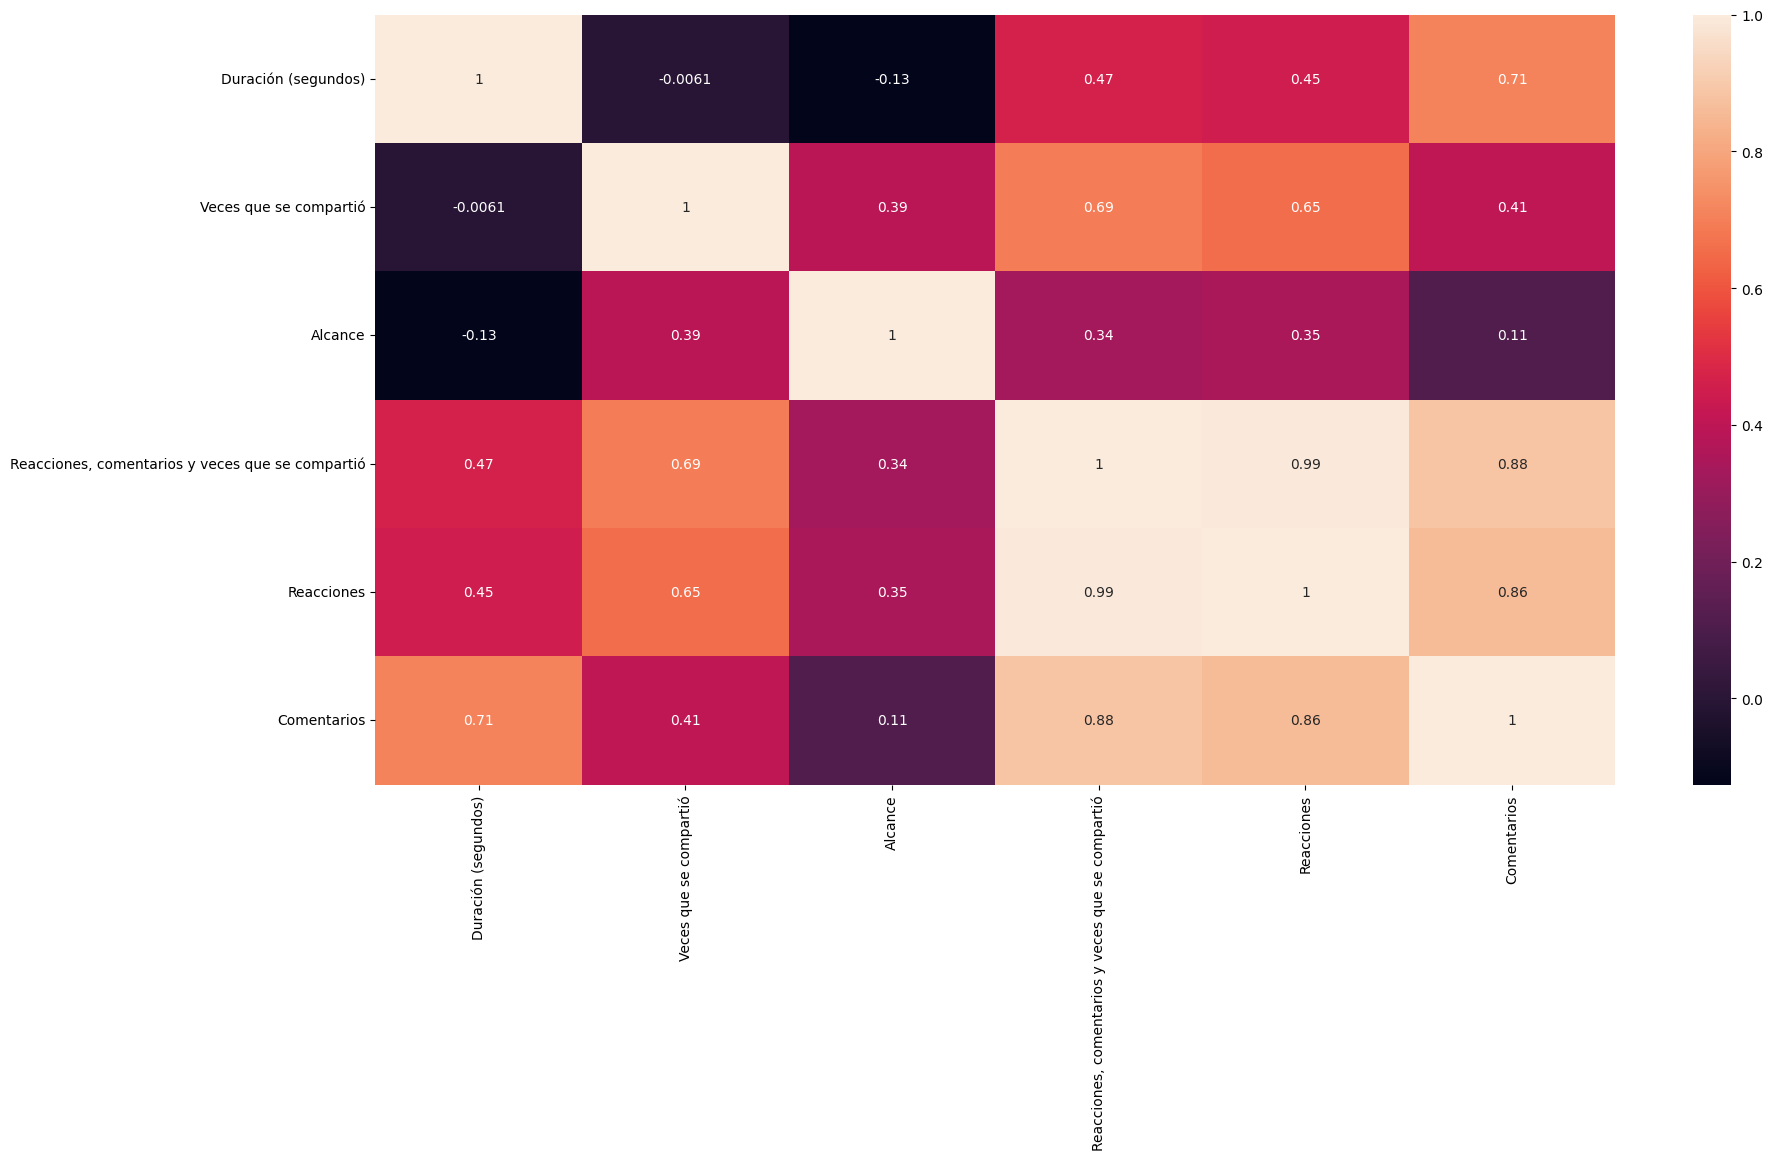

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_vital_municipalidad_face.corr(),  annot=True)

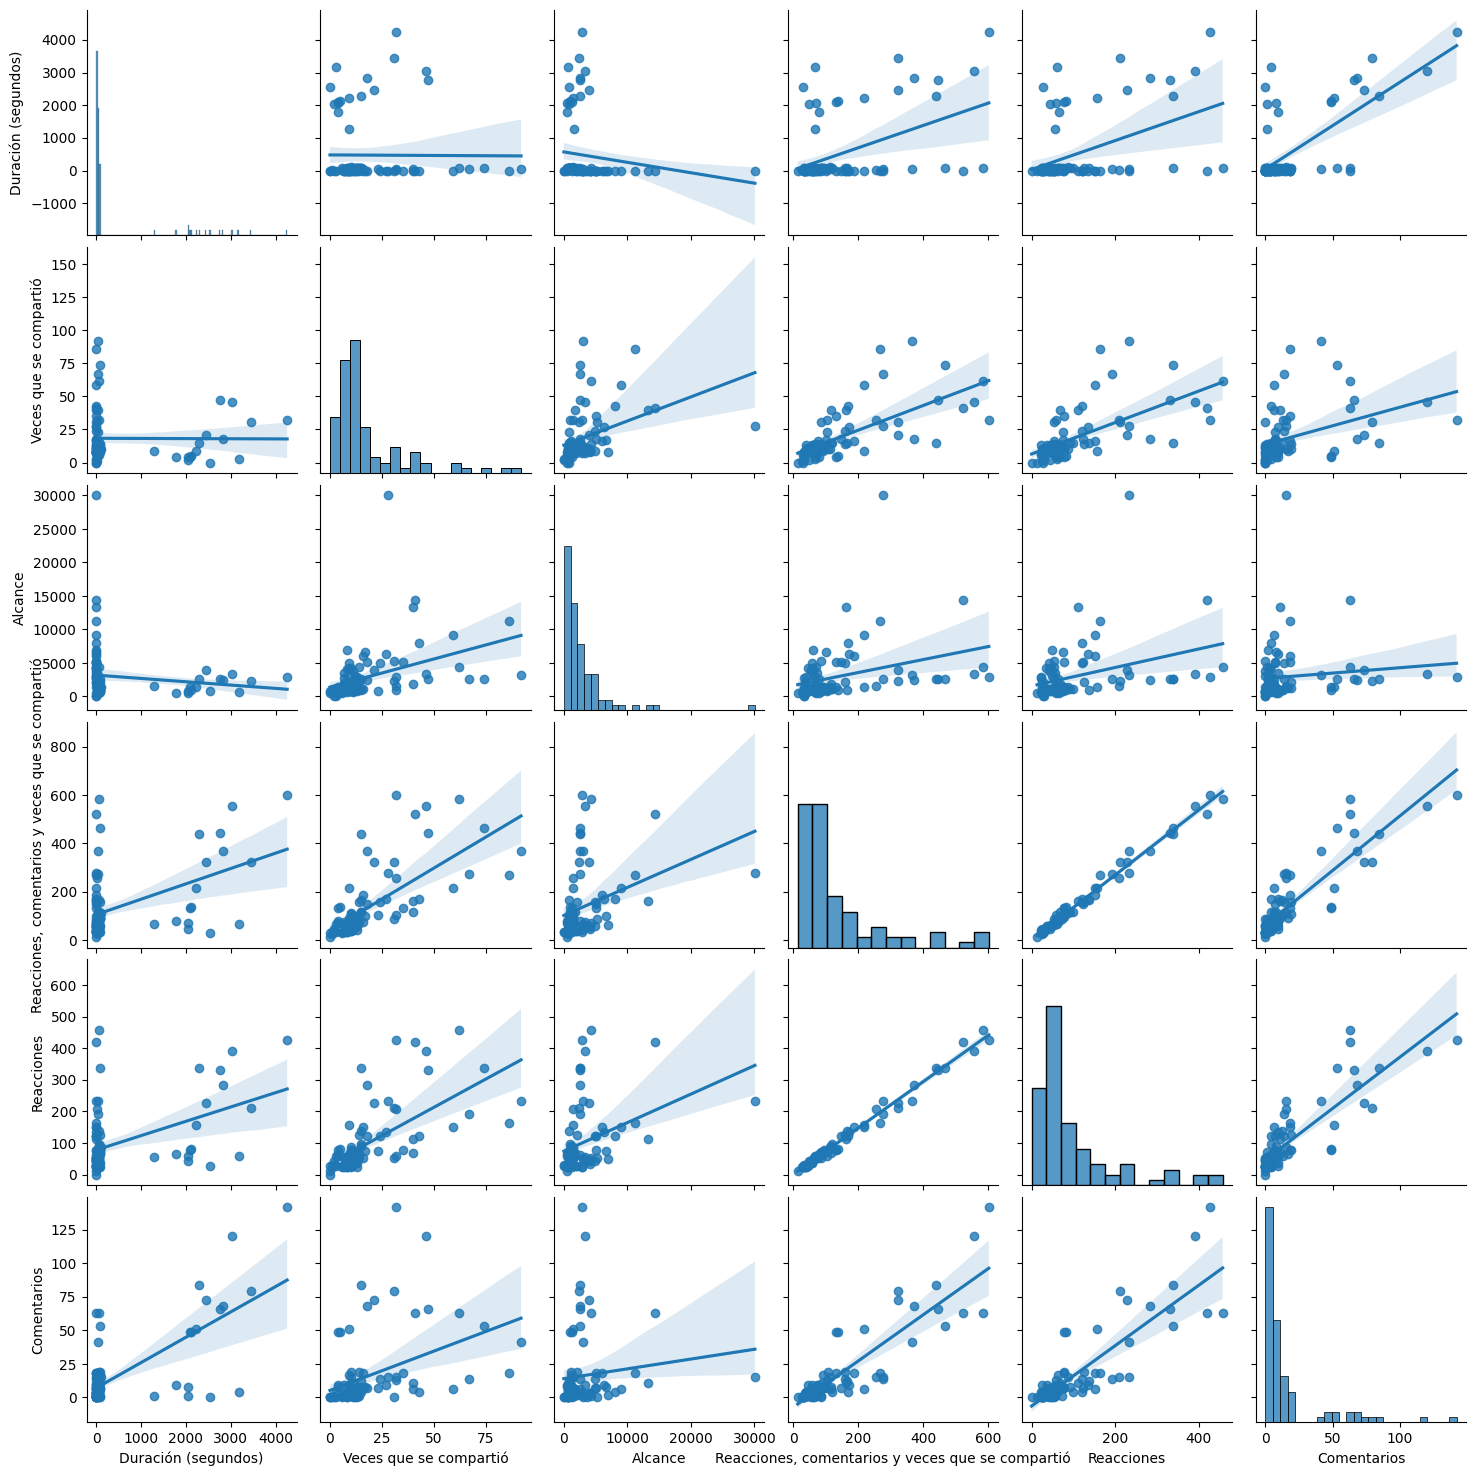

In [ ]:
sns.pairplot(data_cuantitativa_vital_municipalidad_face, kind='reg')

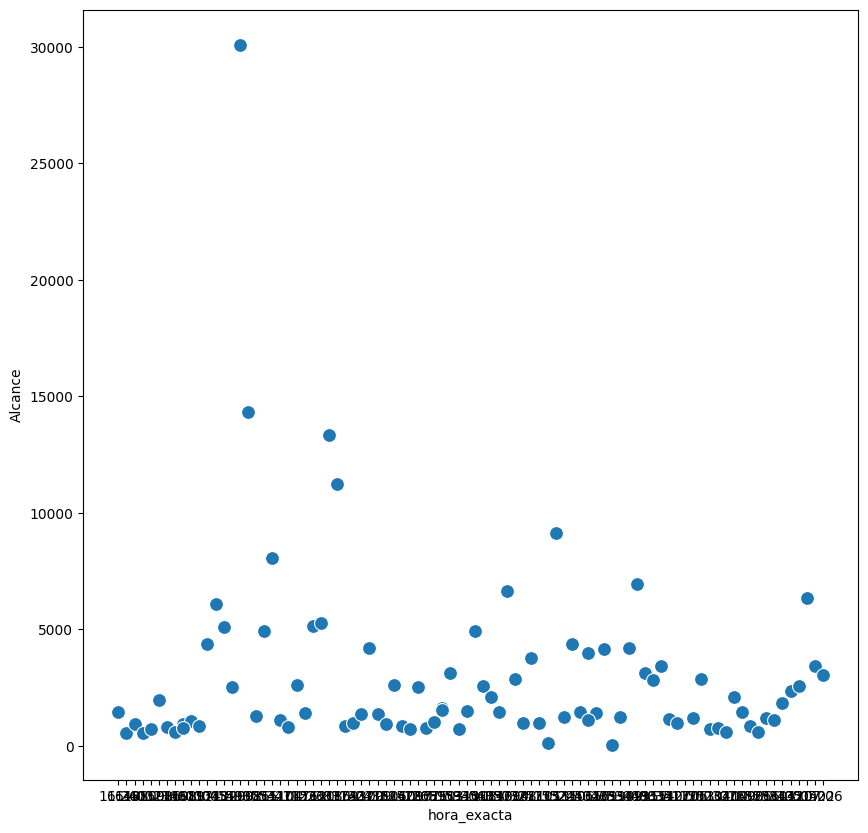

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='hora_exacta', y='Alcance', s=100)

# Mostrar el gr√°fico
plt.show()

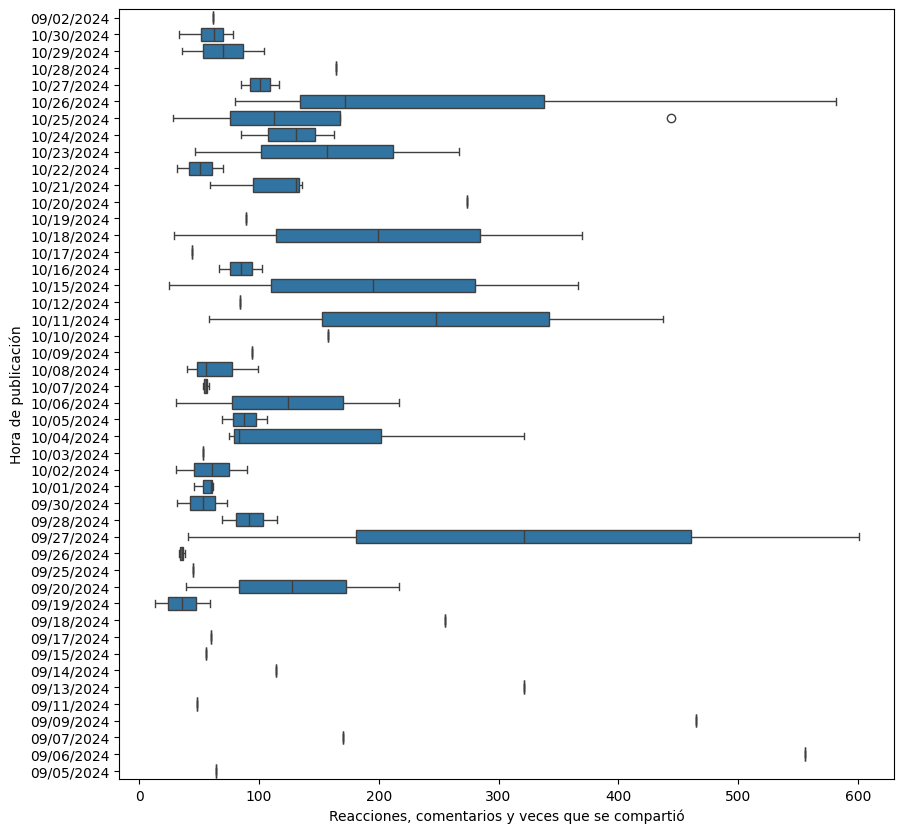

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_data_vital['Reacciones, comentarios y veces que se comparti√≥'], y=data_municipalidad_data_vital['Hora de publicaci√≥n'])

# Configurar etiquetas de los ejes
plt.xlabel('Reacciones, comentarios y veces que se comparti√≥')
plt.ylabel('Hora de publicaci√≥n')

# Mostrar el gr√°fico
plt.show()


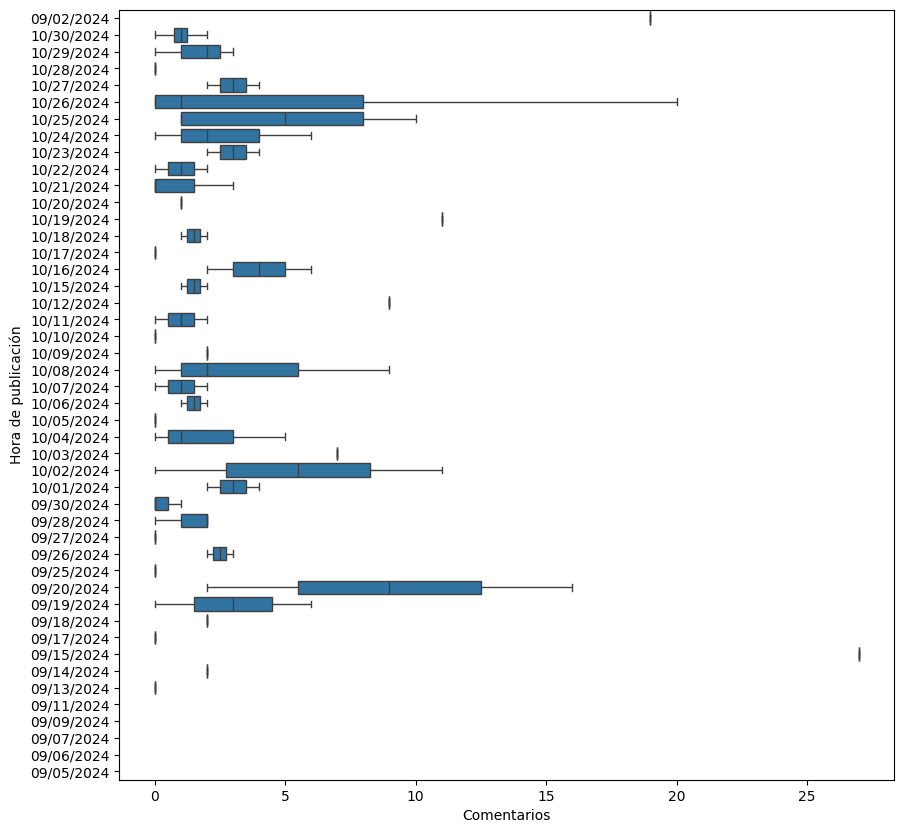

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_instagram['Comentarios'], y=data_municipalidad_data_vital['Hora de publicaci√≥n'])

# Configurar etiquetas de los ejes
plt.xlabel('Comentarios')
plt.ylabel('Hora de publicaci√≥n')

# Mostrar el gr√°fico
plt.show()


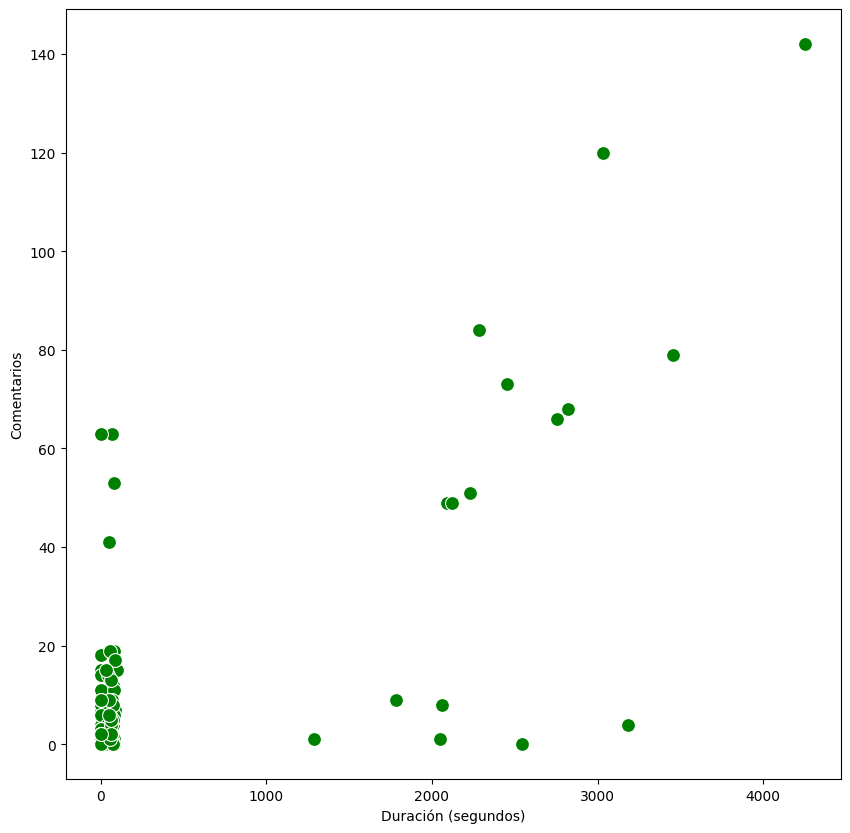

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_cuantitativa_vital_municipalidad_face, x='Duraci√≥n (segundos)', y='Comentarios', s=100, color='green')

# Mostrar el gr√°fico
plt.show()

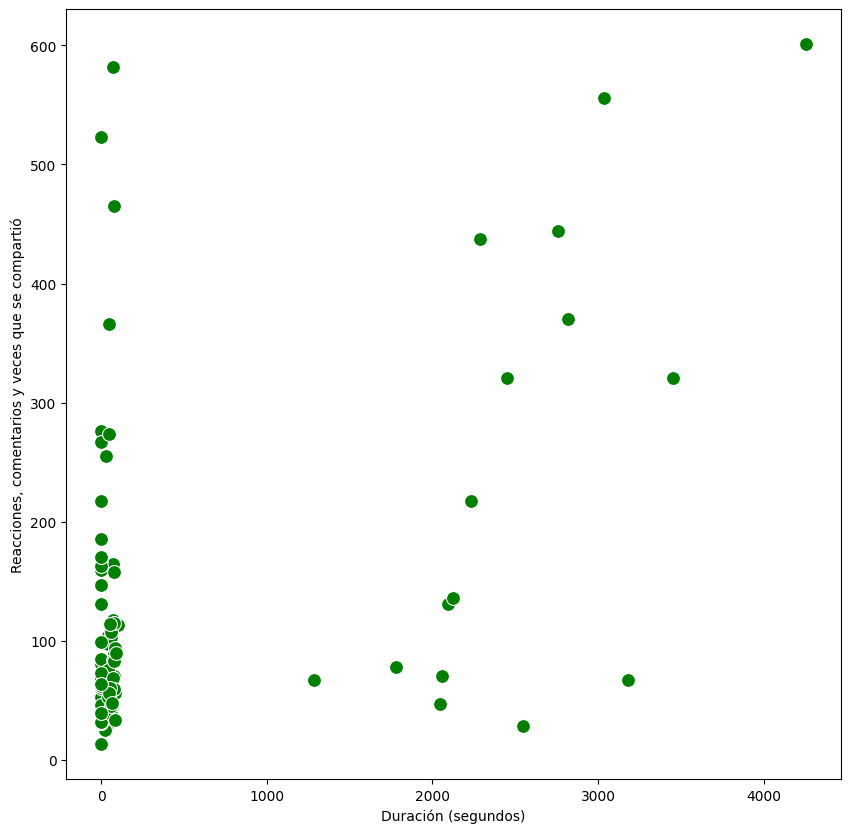

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='Duraci√≥n (segundos)', y='Reacciones, comentarios y veces que se comparti√≥', s=100, color='green')

# Mostrar el gr√°fico
plt.show()

In [ ]:
data_correla= data_municipalidad_facebook[['Comentarios', 'Duraci√≥n (segundos)', 'Total de clics', 'Reacciones','Alcance']]
data_correla.head()

Comentarios  Duraci√≥n (segundos)  Total de clics  Reacciones  Alcance
0            1                   57             0.0          54   1454.0
1            1                   68             0.0          26    538.0
2            5                   67             0.0          41    918.0
3            9                 1781             NaN          65    546.0
4            4                 3183             NaN          60    728.0

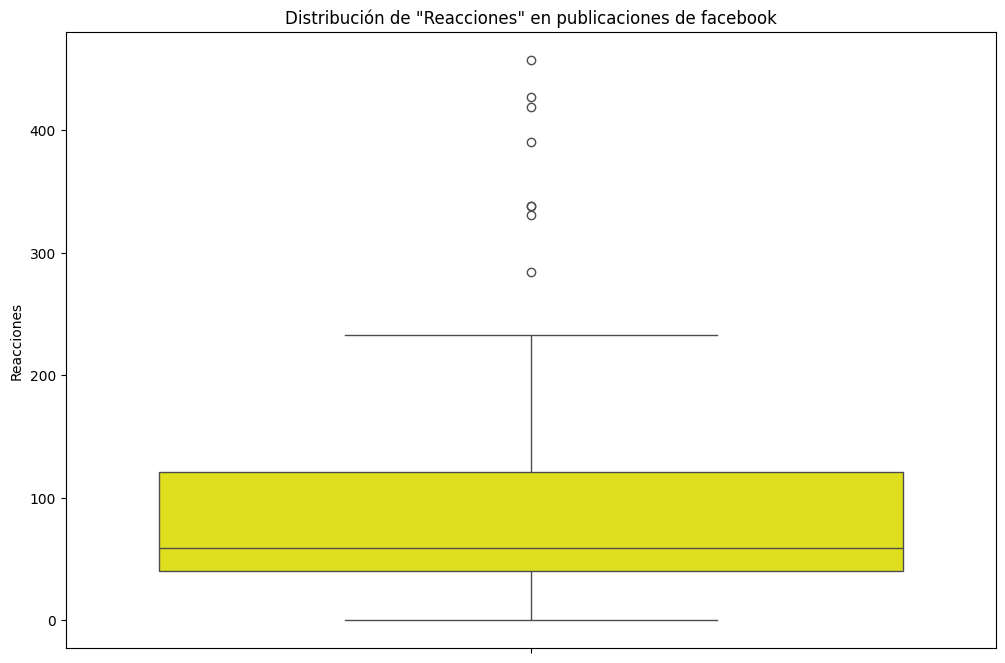

In [ ]:
# Suponiendo que 'data_cuantitativa_proyectos_insta_tipo_publica' es el DataFrame filtrado con los datos relevantes
# Crear el gr√°fico boxplot con tama√±o aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_municipalidad_data_vital['Reacciones'], color='yellow')
plt.title('Distribuci√≥n de "Reacciones" en publicaciones de facebook')
plt.show()

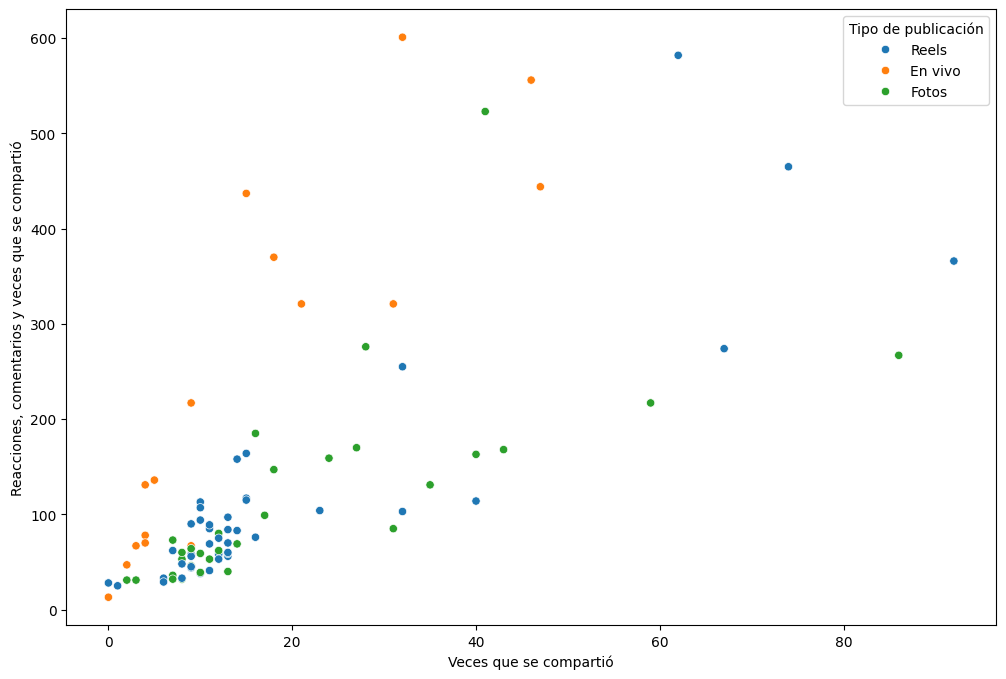

In [ ]:
# Crear la gr√°fica de dispersi√≥n y aumentar el tama√±o
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_municipalidad_data_vital,
    x='Veces que se comparti√≥',
    y='Reacciones, comentarios y veces que se comparti√≥',
    hue='Tipo de publicaci√≥n'
)

# Mostrar la gr√°fica
plt.show()

In [ ]:
data_cuantitativa_municipalidad_insta= data_municipalidad_instagram[['Veces que se guard√≥','Impresiones','Veces que se comparti√≥','Alcance', 'Me gusta','Reproducciones','Comentarios','Seguimientos','Duraci√≥n (segundos)']]
data_cuantitativa_municipalidad_insta.head()

Veces que se guard√≥  Impresiones  Veces que se comparti√≥  Alcance  \
0                    3       4972.0                      31   3802.0   
1                    0       1602.0                       2   1322.0   
2                    0       1683.0                       3   1416.0   
3                    3       1856.0                       7   1704.0   
4                    0          NaN                       2      NaN   

   Me gusta  Reproducciones  Comentarios  Seguimientos  Duraci√≥n (segundos)  
0       355             NaN           19           1.0                    0  
1        35          2149.0            2           2.0                   56  
2        33             NaN            1           NaN                   68  
3        62             NaN            0           2.0                   67  
4        69             NaN            1           NaN                    0

In [ ]:
data_cuantitativa_municipalidad_insta.describe()

Veces que se guard√≥  Impresiones  Veces que se comparti√≥      Alcance  \
count            86.000000    72.000000               86.000000    72.000000   
mean              1.593023  3162.305556               10.465116  2535.875000   
std               2.313021  2237.272803               14.502493  1670.492539   
min               0.000000   578.000000                0.000000   551.000000   
25%               0.000000  1582.000000                2.000000  1288.500000   
50%               1.000000  2320.000000                5.000000  1906.000000   
75%               2.000000  4356.750000               10.000000  3293.750000   
max              11.000000  9754.000000               67.000000  7371.000000   

         Me gusta  Reproducciones  Comentarios  Seguimientos  \
count   86.000000          7.0000    86.000000     29.000000   
mean   106.279070       2555.0000     3.151163      2.206897   
std    102.037438        630.9477     4.873741      2.024481   
min     24.000000       1663.0000     0.000000      1.000000   
25%     42.250000       2089.5000     0.000000      1.000000   
50%     64.000000       2623.0000     2.000000      1.000000   
75%    124.250000       2998.0000     3.000000      2.000000   
max    534.000000       3424.0000    27.000000      9.000000   

       Duraci√≥n (segundos)  
count            86.000000  
mean            244.825581  
std             785.209005  
min               0.000000  
25%               0.000000  
50%              49.000000  
75%              68.000000  
max            4243.000000

<Axes: >

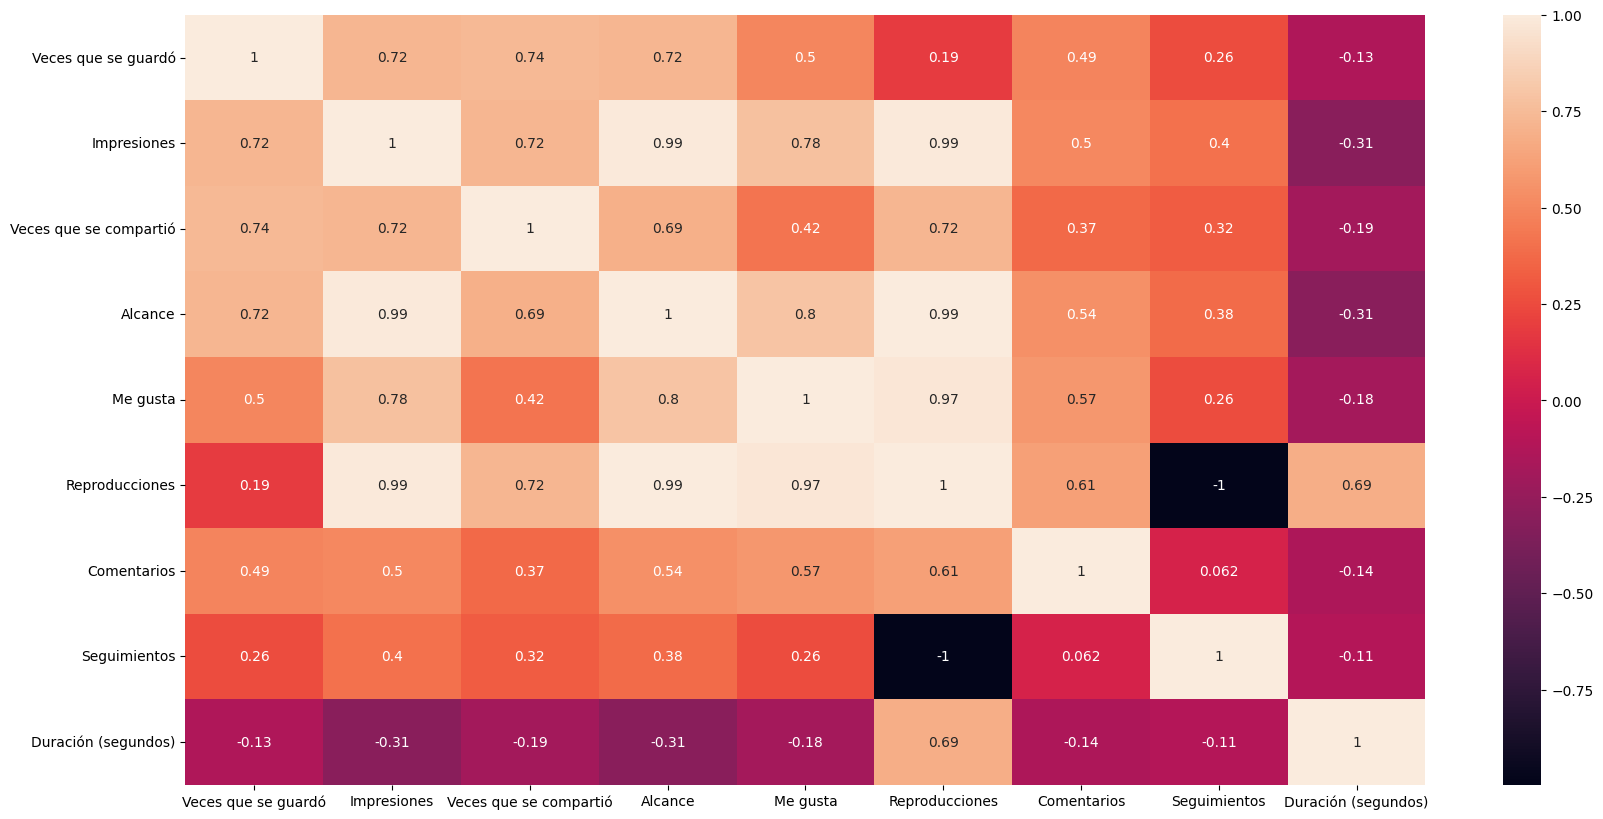

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_municipalidad_insta.corr(),  annot=True)

count    29.000000
mean      2.206897
std       2.024481
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       9.000000
Name: Seguimientos, dtype: float64


<Axes: >

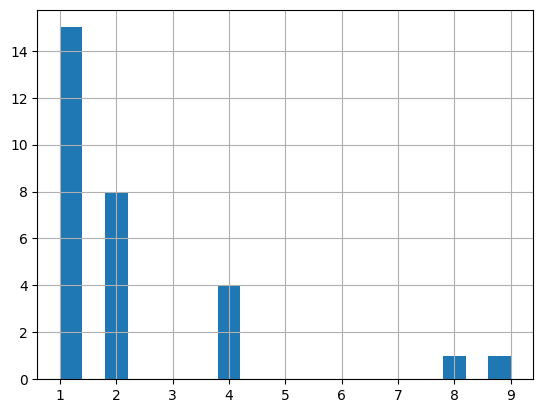

In [ ]:
# Resumen estad√≠stico b√°sico
print(data_cuantitativa_municipalidad_insta['Seguimientos'].describe())

# Histograma de "Seguimientos"
data_cuantitativa_municipalidad_insta['Seguimientos'].hist(bins=20)

In [ ]:
correlacion_seguimientos = data_cuantitativa_municipalidad_insta.corr()['Seguimientos']
print(correlacion_seguimientos)


Veces que se guard√≥       0.258172
Impresiones               0.404316
Veces que se comparti√≥    0.317641
Alcance                   0.381151
Me gusta                  0.258370
Reproducciones           -0.997031
Comentarios               0.061842
Seguimientos              1.000000
Duraci√≥n (segundos)      -0.111840
Name: Seguimientos, dtype: float64


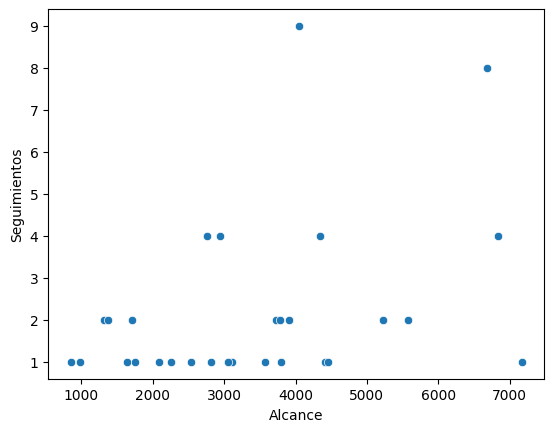

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gr√°fico de dispersi√≥n de "Seguimientos" vs "Alcance"
sns.scatterplot(x=data_cuantitativa_municipalidad_insta['Alcance'], y=data_cuantitativa_municipalidad_insta['Seguimientos'])
plt.show()


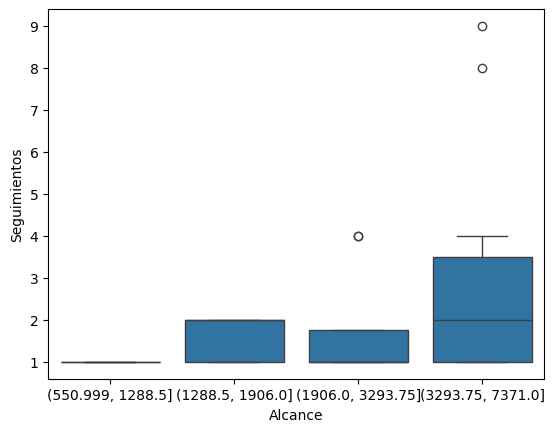

In [ ]:
sns.boxplot(x=pd.qcut(data_cuantitativa_municipalidad_insta['Alcance'], 4), y=data_cuantitativa_municipalidad_insta['Seguimientos'])
plt.show()


In [ ]:
# Verificar si hay valores NaN en el dataset
print(data_cuantitativa_municipalidad_insta.isnull().sum())

# Eliminar filas que contengan NaN
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta.dropna()

# Reemplazar NaN con la media de cada columna
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta.fillna(data_cuantitativa_municipalidad_insta.mean())

# Verificar si hay valores infinitos en el dataset
print(np.isinf(data_cuantitativa_municipalidad_insta).sum())

# Reemplazar valores infinitos con NaN y luego eliminarlos
data_cuantitativa_municipalidad_insta.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cuantitativa_municipalidad_insta.dropna(inplace=True)

# Resumen estad√≠stico para verificar los valores m√°ximos en cada columna
print(data_cuantitativa_municipalidad_insta.describe())

from sklearn.preprocessing import StandardScaler

# Normalizar las columnas num√©ricas
scaler = StandardScaler()
data_cuantitativa_municipalidad_insta_scaled = scaler.fit_transform(data_cuantitativa_municipalidad_insta)

# Por ejemplo, si el valor en la columna 'Seguimientos' supera un umbral razonable
data_cuantitativa_municipalidad_insta = data_cuantitativa_municipalidad_insta[data_cuantitativa_municipalidad_insta['Seguimientos'] < 10000]



Veces que se guard√≥        0
Impresiones               14
Veces que se comparti√≥     0
Alcance                   14
Me gusta                   0
Reproducciones            79
Comentarios                0
Seguimientos              57
Duraci√≥n (segundos)        0
dtype: int64
Veces que se guard√≥       0
Impresiones               0
Veces que se comparti√≥    0
Alcance                   0
Me gusta                  0
Reproducciones            0
Comentarios               0
Seguimientos              0
Duraci√≥n (segundos)       0
dtype: int64
       Veces que se guard√≥  Impresiones  Veces que se comparti√≥      Alcance  \
count             3.000000      3.00000                3.000000     3.000000   
mean              0.666667   1969.00000                5.333333  1647.333333   
std               0.577350    578.60954                4.163332   524.161553   
min               0.000000   1602.00000                2.000000  1322.000000   
25%               0.500000   1635.50000              

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar variables para agrupar
X = data_cuantitativa_municipalidad_insta[['Alcance', 'Impresiones', 'Me gusta', 'Comentarios', 'Seguimientos']]

# Ajustar KMeans
kmeans = KMeans(n_clusters=3)
data_cuantitativa_municipalidad_insta['Cluster'] = kmeans.fit_predict(X)

# An√°lisis de seguimientos en cada cluster
print(data_cuantitativa_municipalidad_insta.groupby('Cluster')['Seguimientos'].mean())


Cluster
0    1.0
1    2.0
2    2.0
Name: Seguimientos, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

X = data_cuantitativa_municipalidad_insta[['Alcance', 'Impresiones', 'Veces que se guard√≥']]  # Variables predictoras
y = data_cuantitativa_municipalidad_insta['Seguimientos']  # Variable objetivo

modelo = LinearRegression()
modelo.fit(X, y)

print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")


Coeficientes: [-0.00451205  0.00309064  0.00048117]
Intercepto: 3.0137191022268377


In [ ]:
indice_Alcance_maximo = data_municipalidad_instagram['Alcance'].idxmax()
id_publicacion_Alcance_maximo = data_municipalidad_instagram.loc[indice_Alcance_maximo, 'Identificador de la publicaci√≥n']
# Mostrar la descripci√≥n completa de estas publicaciones
descripcion_Alcance_maximo = data_municipalidad_instagram.loc[data_municipalidad_instagram['Identificador de la publicaci√≥n'] == id_publicacion_Alcance_maximo, 'Descripci√≥n'].values[0]


print("Descripci√≥n de la publicaci√≥n con mayor cantidad de (Alcance) (ID:", id_publicacion_Alcance_maximo, "):", descripcion_Alcance_maximo)

Descripci√≥n de la publicaci√≥n con mayor cantidad de (Alcance) (ID: 18285827224210023 ): ¬°Seguimos aqu√≠ en el Coliseo de Ferias viviendo el Mundo de la Fantas√≠a! üéâ‚ú® 

Los invitamos a que vengan a disfrutar de nuestros maravillosos stands llenos de magia y diversi√≥n. ¬°No se lo pierdan, todos los ni√±os y ni√±as son bienvenidos! ‚ú®ü™Ñüíô #ParaSerFelices #MundoDeLaFantas√≠a


In [ ]:
# Encuentra los √≠ndices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_menores_MEGUSTAS =  data_municipalidad_instagram['Me gusta'].nsmallest(3).index

# Obt√©n y imprime las descripciones de estas tres publicaciones
descripciones_menores_MEGUSTAS = data_municipalidad_instagram.loc[indices_menores_MEGUSTAS, 'Descripci√≥n'].values
print("Descripciones de las tres publicaciones con menor cantidad de (me gustas):")
for descripcion in descripciones_menores_MEGUSTAS:
    print("-" + descripcion)


Descripciones de las tres publicaciones con menor cantidad de (me gustas):
-üå± ¬°Inicia la Siembra! üå±
Desde la SEDAMA, damos inicio a la siembra responsable de 50 √°rboles en la Avenida Cali, utilizando el m√©todo de goteo para garantizar su crecimiento saludable.
Invitamos a toda nuestra comunidad tulue√±a a unirse a esta importante labor ambiental, aportando su apoyo y compromiso para cuidar y preservar nuestro entorno. Juntos hacemos de Tulu√° un municipio m√°s verde y sostenible #ParaSerFelices üíôüå≥üíß
-Celebramos Amor y Amistad con nuestra comunidad #ParaSerFelices üíô
-¬°Hemos iniciado la reactivaci√≥n del vivero municipal!üå±üí™üèºü™Ñ

Desde la Secretar√≠a de Desarrollo Agropecuario y Medio Ambiente, SEDAMA, estamos impulsando la producci√≥n de material ornamental, forestal y de jardiner√≠a, con el objetivo de llenar de vida y zonas verdes cada rinc√≥n de nuestro municipio. üåøüå∏

Este esfuerzo contribuye a revitalizar nuestros espacios urbanos, creando un ento

In [ ]:
# Encuentra el √≠ndice de la fila con el mayor n√∫mero de comentarios
indice_comentarios_maximo = data_municipalidad_instagram['Comentarios'].idxmax()

# Obt√©n el identificador de la publicaci√≥n con la mayor cantidad de comentarios
id_publicacion_comentarios_maximo = data_municipalidad_instagram.loc[indice_comentarios_maximo, 'Identificador de la publicaci√≥n']

# Mostrar la descripci√≥n completa de la publicaci√≥n
descripcion_comentarios_maximo = data_municipalidad_instagram.loc[data_municipalidad_instagram['Identificador de la publicaci√≥n'] == id_publicacion_comentarios_maximo, 'Descripci√≥n'].values[0]

# Imprime la descripci√≥n de la publicaci√≥n con la mayor cantidad de comentarios
print("Descripci√≥n de la publicaci√≥n con mayor cantidad de comentarios (ID:", id_publicacion_comentarios_maximo, "):", descripcion_comentarios_maximo)


Descripci√≥n de la publicaci√≥n con mayor cantidad de comentarios (ID: 17902716720034011 ): ¬°El alcalde Gustavo V√©lez entreg√≥ m√°s de 4000 mobiliarios escolares! üìö‚ú®

M√°s de 2000 estudiantes de las Instituciones Educativas T√©cnica Industrial Carlos Sarmiento Lora, Juan Mar√≠a C√©spedes y Mar√≠a Antonia Ruiz ahora cuentan con aulas renovadas, comedores, laboratorios y m√°s. Este sue√±o, iniciado en 2016, es hoy una realidad #ParaSerFelices. üëèüí™üíô


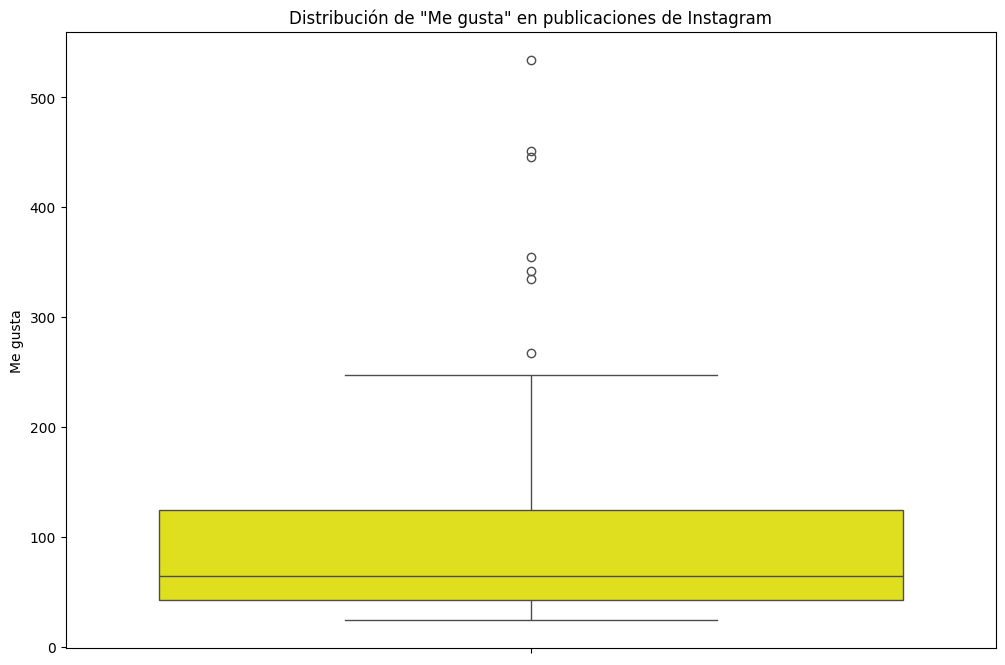

In [ ]:
# Suponiendo que 'data_cuantitativa_proyectos_insta_tipo_publica' es el DataFrame filtrado con los datos relevantes
# Crear el gr√°fico boxplot con tama√±o aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_municipalidad_instagram['Me gusta'], color='yellow')
plt.title('Distribuci√≥n de "Me gusta" en publicaciones de Instagram')
plt.show()

In [ ]:
# Encuentra los √≠ndices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_menores_MEGUSTAS = data_municipalidad_instagram['Me gusta'].nsmallest(3).index

# Obt√©n y imprime las descripciones de estas tres publicaciones
descripciones_menores_MEGUSTAS = data_municipalidad_instagram.loc[indices_menores_MEGUSTAS, 'Descripci√≥n'].values
print("Descripciones de las tres publicaciones con menor cantidad de (me gustas):")
for descripcion in descripciones_menores_MEGUSTAS:
    print("-" + descripcion)


Descripciones de las tres publicaciones con menor cantidad de (me gustas):
-üå± ¬°Inicia la Siembra! üå±
Desde la SEDAMA, damos inicio a la siembra responsable de 50 √°rboles en la Avenida Cali, utilizando el m√©todo de goteo para garantizar su crecimiento saludable.
Invitamos a toda nuestra comunidad tulue√±a a unirse a esta importante labor ambiental, aportando su apoyo y compromiso para cuidar y preservar nuestro entorno. Juntos hacemos de Tulu√° un municipio m√°s verde y sostenible #ParaSerFelices üíôüå≥üíß
-Celebramos Amor y Amistad con nuestra comunidad #ParaSerFelices üíô
-¬°Hemos iniciado la reactivaci√≥n del vivero municipal!üå±üí™üèºü™Ñ

Desde la Secretar√≠a de Desarrollo Agropecuario y Medio Ambiente, SEDAMA, estamos impulsando la producci√≥n de material ornamental, forestal y de jardiner√≠a, con el objetivo de llenar de vida y zonas verdes cada rinc√≥n de nuestro municipio. üåøüå∏

Este esfuerzo contribuye a revitalizar nuestros espacios urbanos, creando un ento

In [ ]:
# Convertir la columna 'Hora de publicaci√≥n' a tipo datetime, manejar errores con 'coerce'
data_municipalidad_instagram['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_instagram['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_municipalidad_instagram['hora_exacta'] = data_municipalidad_instagram['Hora de publicaci√≥n'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicaci√≥n'
data_municipalidad_instagram['Hora de publicaci√≥n'] = data_municipalidad_instagram['Hora de publicaci√≥n'].dt.strftime('%m/%d/%Y')

# Mostrar el DataFrame resultante
print(data_municipalidad_instagram)

    Identificador de la publicaci√≥n  Identificador de la cuenta  \
0                 18013771736547872           17841402591799685   
1                 17916330230981043           17841411919702656   
2                 18051735568931528           17841402591799685   
3                 17979764387767583           17841402591799685   
4                 18051901909767231           17841431512646378   
..                              ...                         ...   
81                18035097734158647           17841402591799685   
82                18012007196626913           17841402591799685   
83                17902716720034011           17841402591799685   
84                17985120056577412           17841402591799685   
85                18043396003964655           17841402591799685   

   Nombre de usuario de la cuenta          Nombre de la cuenta  \
0                 alcaldiadetulua            Alcald√≠a de Tulu√°   
1          hospitalrubencruzvelez  Hospital RubeÃÅn Cruz VeÃ

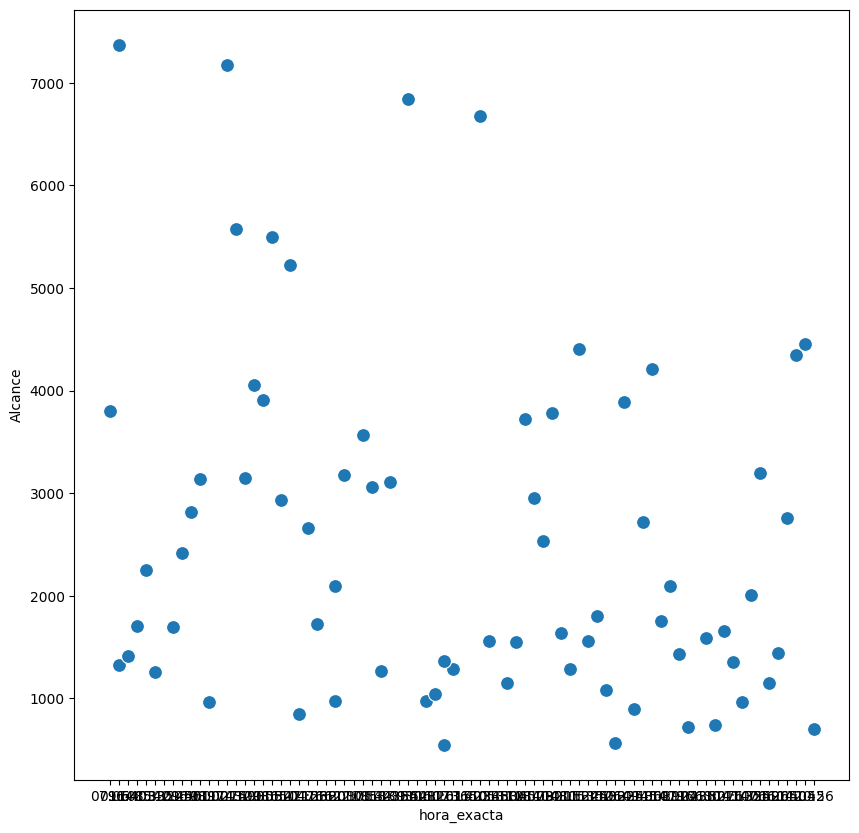

In [ ]:

# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_instagram, x='hora_exacta', y='Alcance', s=100)

# Mostrar el gr√°fico
plt.show()

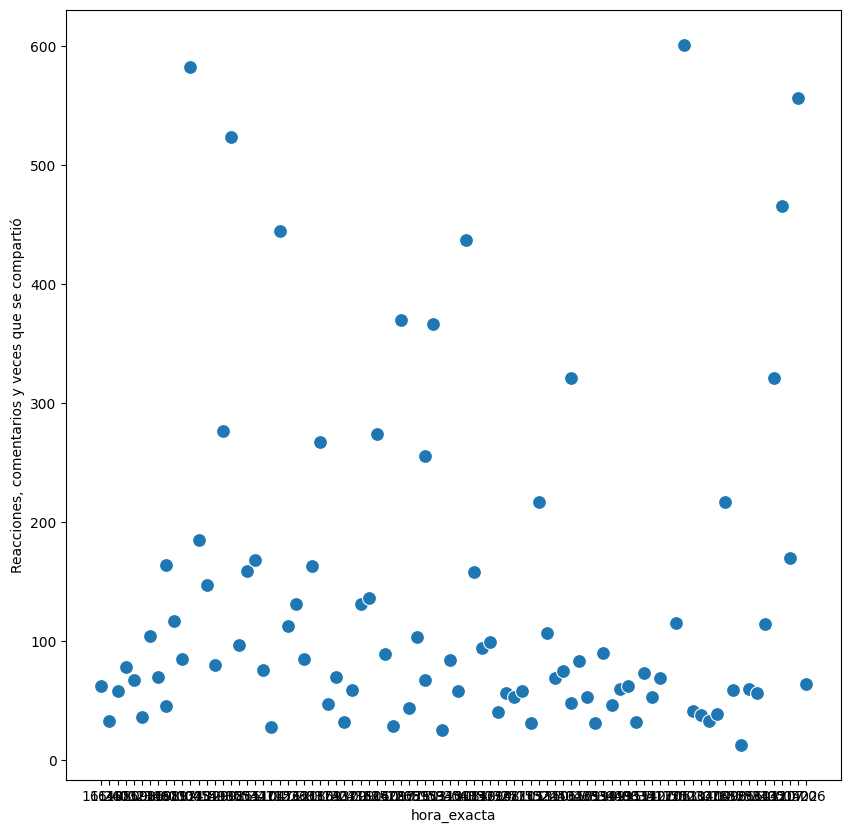

In [ ]:

# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_data_vital, x='hora_exacta', y='Reacciones, comentarios y veces que se comparti√≥', s=100)

# Mostrar el gr√°fico
plt.show()

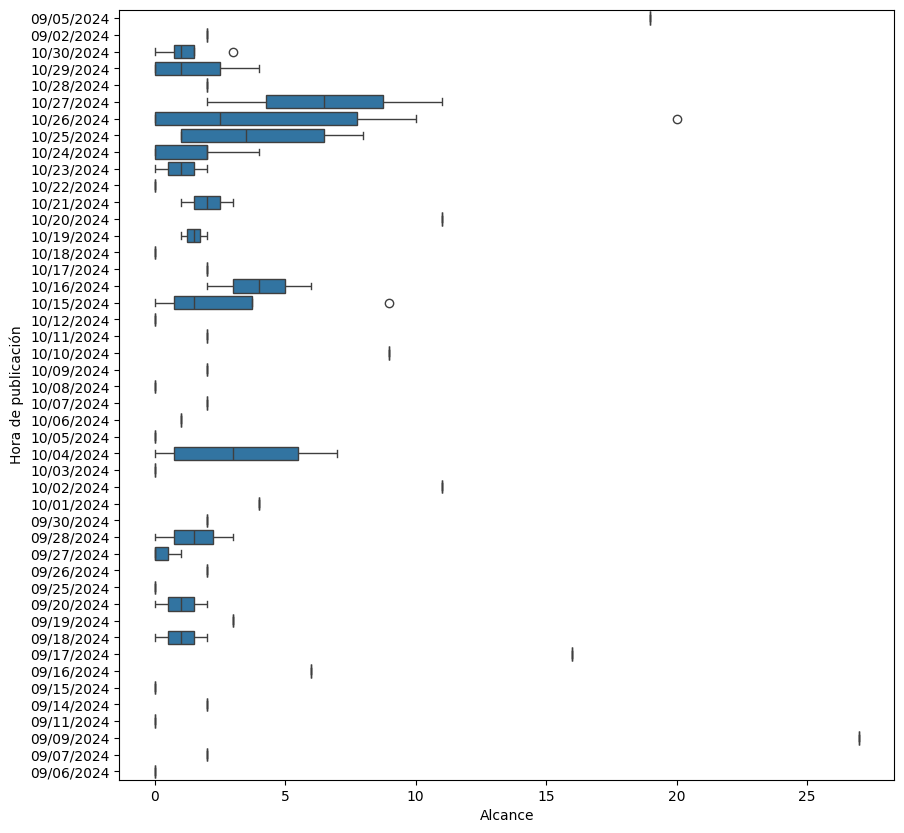

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn
sns.boxplot(x=data_municipalidad_instagram['Comentarios'], y=data_municipalidad_instagram['Hora de publicaci√≥n'])

# Configurar etiquetas de los ejes
plt.xlabel('Alcance')
plt.ylabel('Hora de publicaci√≥n')

# Mostrar el gr√°fico
plt.show()


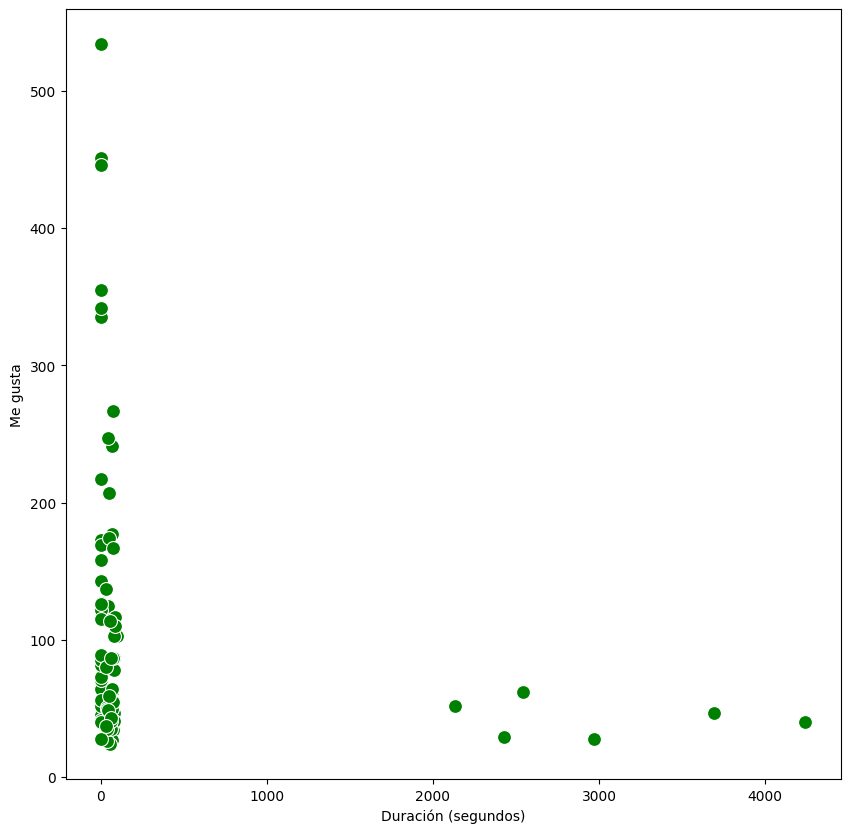

In [ ]:
# Establecer el tama√±o de la figura
plt.figure(figsize=(10, 10))

# Crear el scatter plot con seaborn
sns.scatterplot(data=data_municipalidad_instagram, x='Duraci√≥n (segundos)', y='Me gusta', s=100, color='green')

# Mostrar el gr√°fico
plt.show()

In [ ]:
data_municipalidad_vital_instagram= data_municipalidad_instagram[['Hora de publicaci√≥n', 'Alcance', 'Veces que se comparti√≥', 'Reproducciones','Me gusta','Comentarios','Veces que se guard√≥']]
data_municipalidad_vital_instagram.head()

Hora de publicaci√≥n  Alcance  Veces que se comparti√≥  Reproducciones  \
0          09/05/2024   3802.0                      31             NaN   
1          09/02/2024   1322.0                       2          2149.0   
2          10/30/2024   1416.0                       3             NaN   
3          10/30/2024   1704.0                       7             NaN   
4          10/30/2024      NaN                       2             NaN   

   Me gusta  Comentarios  Veces que se guard√≥  
0       355           19                    3  
1        35            2                    0  
2        33            1                    0  
3        62            0                    3  
4        69            1                    0

In [ ]:
data_municipalidad_data_vital.head()

Descripci√≥n  \
0  ¬°Nuevo servicio de Fisioterapia!üåü             ...   
1  ¬°Mejoramos la conectividad en nuestra zona rur...   
2  üö® ¬°Caen integrantes de ‚ÄúLa Inmaculada‚Äù! üì£\n\nL...   
3                 En vivo con Secretario de Hacienda   
4                                    #ParaSerFelices   

   Identificador de la publicaci√≥n  Reacciones Tipo de publicaci√≥n  \
0                  942933341207332          54               Reels   
1                  987852620048737          26               Reels   
2                  987789106721755          41               Reels   
3                 1491161731599174          65             En vivo   
4                 1205766237352219          60             En vivo   

  Hora de publicaci√≥n  Impresiones  Alcance  \
0          09/02/2024       1745.0   1454.0   
1          10/30/2024        547.0    538.0   
2          10/30/2024        937.0    918.0   
3          10/30/2024          NaN    546.0   
4          10/30/2024          NaN    728.0   

   Reacciones, comentarios y veces que se comparti√≥  Comentarios  \
0                                              62.0            1   
1                                              33.0            1   
2                                              58.0            5   
3                                              78.0            9   
4                                              67.0            4   

   Veces que se comparti√≥  Total de clics  Duraci√≥n (segundos) hora_exacta  \
0                       7             0.0                   57       16:26   
1                       6             0.0                   68       16:40   
2                      12             0.0                   67       14:03   
3                       4             NaN                 1781       13:02   
4                       3             NaN                 3183       08:21   

   Interacciones_totales  
0                     62  
1                     33  
2                     58  
3                     78  
4                     67

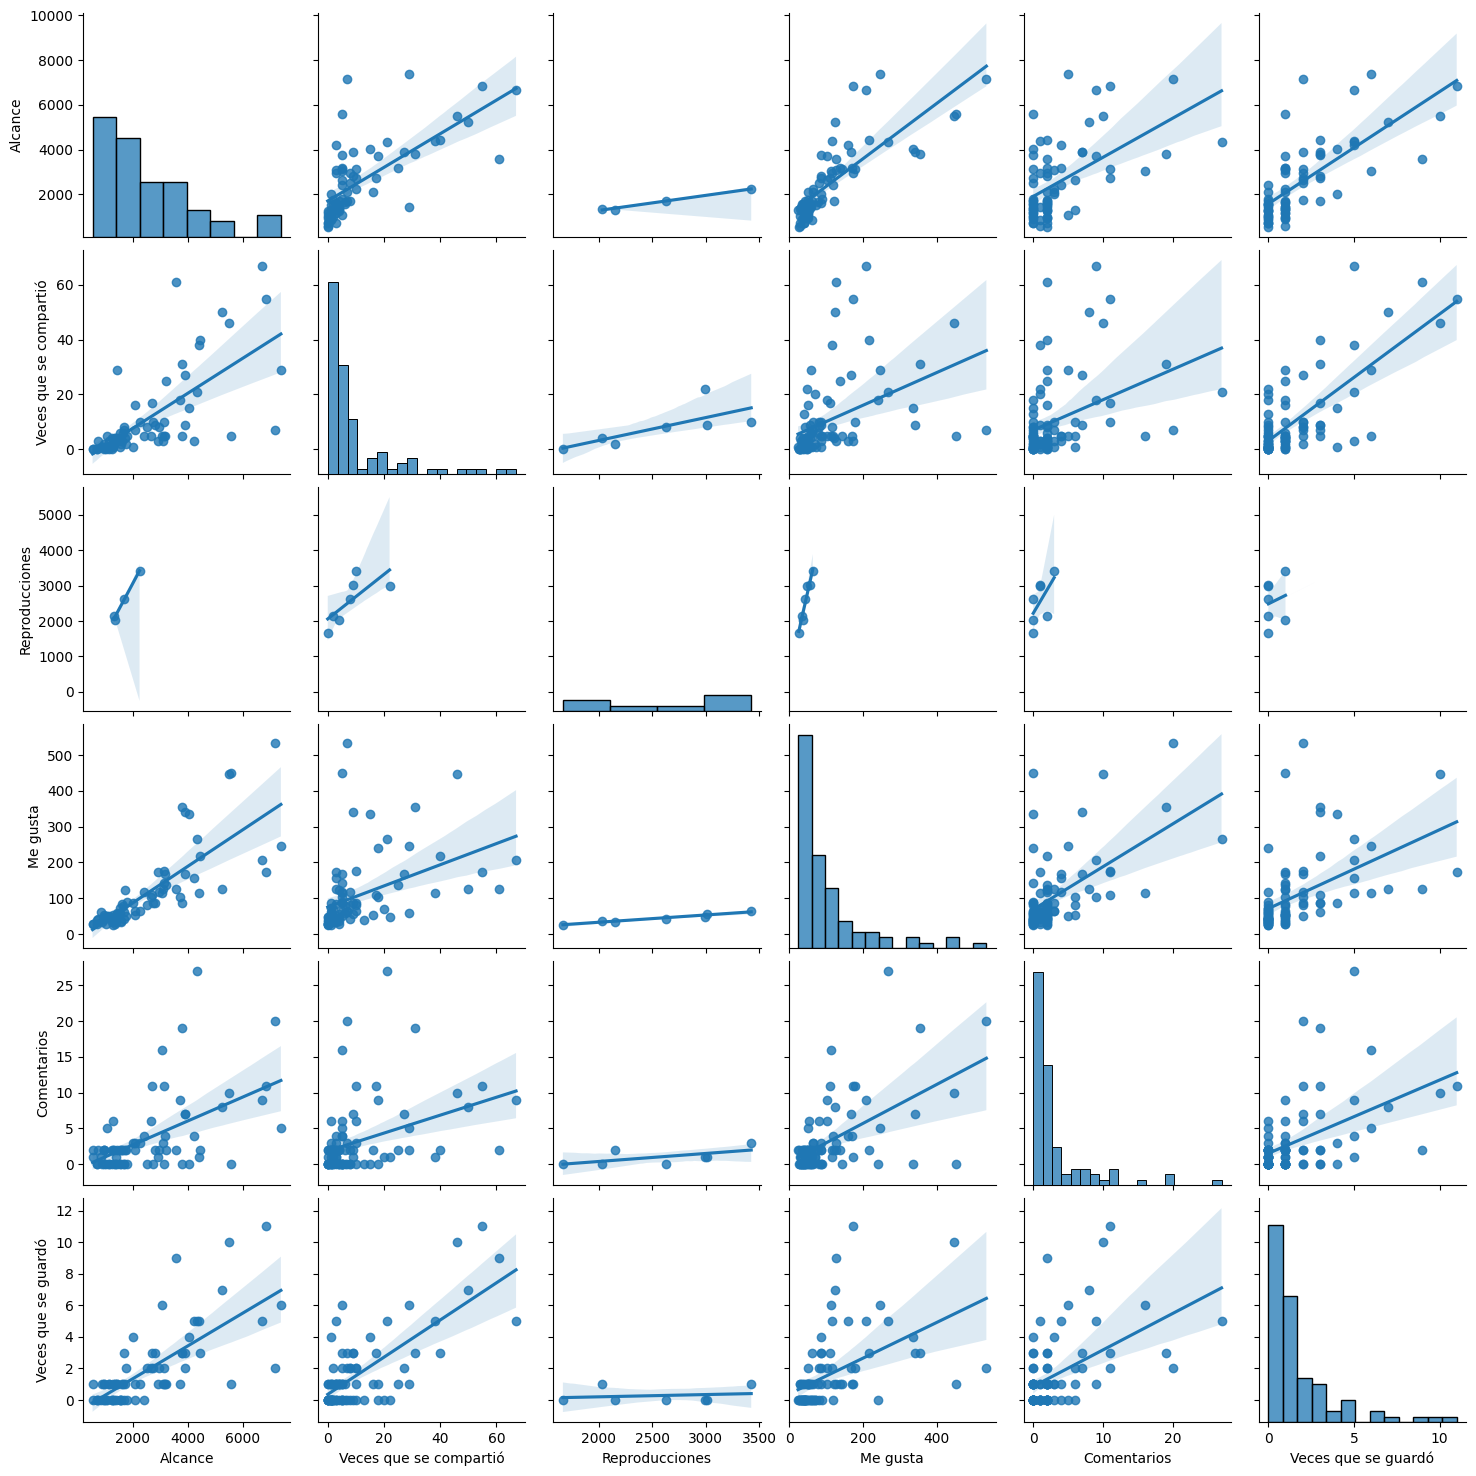

In [ ]:
sns.pairplot(data_municipalidad_vital_instagram, kind='reg')

<ipython-input-73-28d8a83f7266>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_municipalidad_vital_instagram['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_vital_instagram['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')


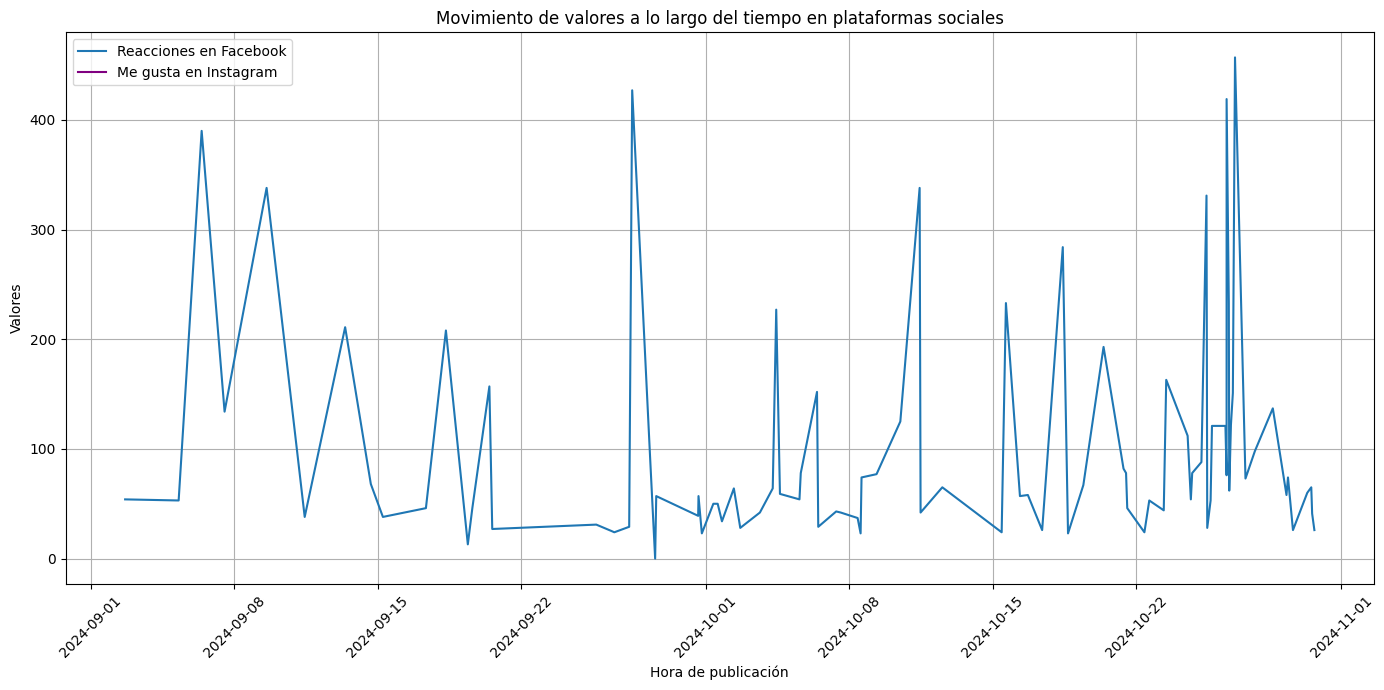

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que no haya espacios en los nombres de las columnas de ambos datasets
data_municipalidad_facebook.columns = data_municipalidad_facebook.columns.str.strip()
data_municipalidad_vital_instagram.columns = data_municipalidad_vital_instagram.columns.str.strip()

# Convertir 'Hora de publicaci√≥n' a formato datetime y ordenar por fecha en ambos datasets
data_municipalidad_facebook['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_facebook['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')
data_municipalidad_vital_instagram['Hora de publicaci√≥n'] = pd.to_datetime(data_municipalidad_vital_instagram['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')

# Ordenar por 'Hora de publicaci√≥n'
data_municipalidad_facebook = data_municipalidad_facebook.sort_values(by='Hora de publicaci√≥n')
data_municipalidad_vital_instagram = data_municipalidad_vital_instagram.sort_values(by='Hora de publicaci√≥n')

# Interpolar valores nulos para las columnas necesarias en ambos datasets
data_municipalidad_facebook['Reacciones'] = data_municipalidad_facebook['Reacciones'].interpolate()
data_municipalidad_vital_instagram['Me gusta'] = data_municipalidad_vital_instagram['Me gusta'].interpolate()

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_municipalidad_facebook['Hora de publicaci√≥n'], data_municipalidad_facebook['Reacciones'], label='Reacciones en Facebook')
plt.plot(data_municipalidad_vital_instagram['Hora de publicaci√≥n'], data_municipalidad_vital_instagram['Me gusta'], label='Me gusta en Instagram', color='purple')  # Color morado para Instagram

plt.xlabel('Hora de publicaci√≥n')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en plataformas sociales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
data_primeros_15_agosto = pd.read_csv('Data_bussines_suite_meta/Jul-31-2024_Sep-01-2024_3712938279022902.csv')
data_primeros_15_septiembre = pd.read_csv('Data_bussines_suite_meta/Sep-01-2024_Sep-15-2024_1557380705154786.csv')

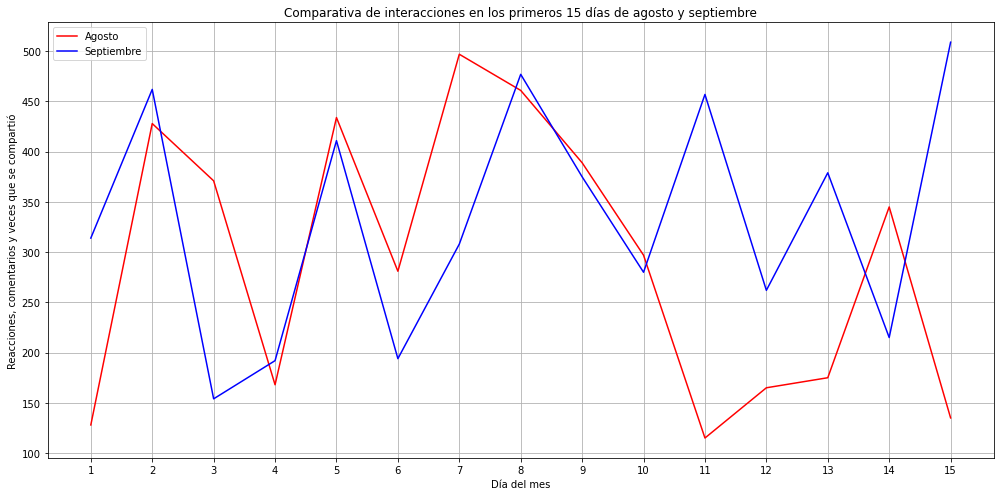

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear datasets dummy
dias = range(1, 16)
data_primeros_15_agosto = pd.DataFrame({
    'D√≠a': dias,
    'Reacciones, comentarios y veces que se comparti√≥': np.random.randint(100, 500, size=15)
})

data_primeros_15_septiembre = pd.DataFrame({
    'D√≠a': dias,
    'Reacciones, comentarios y veces que se comparti√≥': np.random.randint(150, 550, size=15)
})

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de agosto en rojo
plt.plot(data_primeros_15_agosto['D√≠a'],
         data_primeros_15_agosto['Reacciones, comentarios y veces que se comparti√≥'],
         label='Agosto', color='red')

# Graficar los valores de septiembre en azul
plt.plot(data_primeros_15_septiembre['D√≠a'],
         data_primeros_15_septiembre['Reacciones, comentarios y veces que se comparti√≥'],
         label='Septiembre', color='blue')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('D√≠a del mes')
plt.ylabel('Reacciones, comentarios y veces que se comparti√≥')
plt.title('Comparativa de interacciones en los primeros 15 d√≠as de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(dias)  # Mostrar los d√≠as del 1 al 15 en el eje X
plt.tight_layout()

# Mostrar gr√°fico
plt.show()


In [ ]:
data_primeros_15_agosto = pd.read_csv('Data_bussines_suite_meta/Jul-31-2024_Sep-01-2024_3841465006139517.csv')
data_primeros_15_septiembre = pd.read_csv('Data_bussines_suite_meta/Sep-01-2024_Sep-15-2024_1470341180336572.csv')

In [ ]:
data_primeros_15_agosto.head()

Identificador de la publicaci√≥n  Identificador de la cuenta  \
0                17892843947985175           17841402591799685   
1                18323656753150951           17841411919702656   
2                18043769962823826           17841402591799685   
3                18067617517597046           17841402591799685   
4                18128188972371585           17841402591799685   

  Nombre de usuario de la cuenta          Nombre de la cuenta  \
0                alcaldiadetulua            Alcald√≠a de Tulu√°   
1         hospitalrubencruzvelez  Hospital RubeÃÅn Cruz VeÃÅlez   
2                alcaldiadetulua            Alcald√≠a de Tulu√°   
3                alcaldiadetulua            Alcald√≠a de Tulu√°   
4                alcaldiadetulua            Alcald√≠a de Tulu√°   

                                         Descripci√≥n  Duraci√≥n (segundos)  \
0  ¬°Corre seguro este domingo!‚úÖüëüüèÉüèºüèÉüèº‚Äç‚ôÄÔ∏è \n\nDesde...                   65   
1  üì£ Se informa a la ciudadan√≠a que la estrategia...                   42   
2  ¬°Caen integrantes de la Inmaculada encargados ...                   31   
3  ¬°Encuentros con el Alcalde!üôåüèΩ‚úÖ\n\nBienvenidos ...                 4076   
4  üéâ ¬°PAPAYAZO TRIBUTARIO 2024! üí∞ ‚úÖ\n\nAprovecha ...                    0   

  Hora de publicaci√≥n                            Enlace permanente  \
0 2024-08-02 16:08:00  https://www.instagram.com/reel/C-L5NsyuR5Y/   
1 2024-08-02 06:08:00  https://www.instagram.com/reel/C-K1GR7uLa9/   
2 2024-08-30 14:08:00  https://www.instagram.com/reel/C_TxMIavnB9/   
3 2024-08-30 11:08:00  https://www.instagram.com/reel/C_TcpRbO504/   
4 2024-08-30 09:08:00     https://www.instagram.com/p/C_TRJn2uZ0m/   

      Tipo de publicaci√≥n  Comentario sobre los datos  Fecha  Impresiones  \
0       Reel de Instagram                         NaN  Total       4642.0   
1       Reel de Instagram                         NaN  Total          NaN   
2       Reel de Instagram                         NaN  Total       3417.0   
3       Reel de Instagram                         NaN  Total        551.0   
4  Secuencia de Instagram                         NaN  Total       2043.0   

   Alcance  Veces que se comparti√≥  Seguimientos  Reproducciones  Me gusta  \
0   3589.0                      10           NaN          8010.0       140   
1      NaN                      17           NaN          4807.0        86   
2   3221.0                       2           NaN          6086.0       112   
3    517.0                       0           NaN           825.0        27   
4   1520.0                      11           1.0             NaN        26   

   Comentarios  Veces que se guard√≥  D√≠a  
0            8                    2    2  
1            9                    0    2  
2            4                    4   30  
3            2                    1   30  
4            2                    3   30

In [ ]:
data_primeros_15_septiembre.head()

Identificador de la publicaci√≥n  Identificador de la cuenta  \
0                18013771736547872           17841402591799685   
1                17916330230981043           17841411919702656   
2                18311623072095718           17841402591799685   
3                18051406663846689           17841402591799685   
4                18035097734158647           17841402591799685   

  Nombre de usuario de la cuenta          Nombre de la cuenta  \
0                alcaldiadetulua            Alcald√≠a de Tulu√°   
1         hospitalrubencruzvelez  Hospital RubeÃÅn Cruz VeÃÅlez   
2                alcaldiadetulua            Alcald√≠a de Tulu√°   
3                alcaldiadetulua            Alcald√≠a de Tulu√°   
4                alcaldiadetulua            Alcald√≠a de Tulu√°   

                                         Descripci√≥n  Duraci√≥n (segundos)  \
0  ¬°Grandes noticias para la educaci√≥n en Tulu√°! ...                    0   
1  ¬°Nuevo servicio de Fisioterapia! üåüü§∏üèº‚Äç‚ôÇÔ∏è\n\nNos...                   56   
2  Revive el live ‚ÄúEncuentros con el Alcalde‚Äùüí™üèº\n...                 3694   
3  ¬°Limpieza y recuperaci√≥n de los espacios!‚úÖüßπ\n\...                   48   
4  ¬°Concluimos la Ruta de la Felicidad en la Comu...                   51   

  Hora de publicaci√≥n                            Enlace permanente  \
0    09/05/2024 07:09     https://www.instagram.com/p/C_icd62ujji/   
1    09/02/2024 09:09  https://www.instagram.com/reel/C_bAuOyuUqD/   
2    09/15/2024 06:09  https://www.instagram.com/reel/C_8HyUaOEhc/   
3    09/15/2024 06:09  https://www.instagram.com/reel/C_8GRpJO_xy/   
4    09/14/2024 16:09  https://www.instagram.com/reel/C_6jjgtOJ2x/   

      Tipo de publicaci√≥n  Comentario sobre los datos  Fecha  \
0  Secuencia de Instagram                         NaN  Total   
1       Reel de Instagram                         NaN  Total   
2       Reel de Instagram                         NaN  Total   
3       Reel de Instagram                         NaN  Total   
4       Reel de Instagram                         NaN  Total   

   Veces que se comparti√≥  Reproducciones  Me gusta  Comentarios  \
0                      31             NaN       355           18   
1                       2          1997.0        34            2   
2                       0          1447.0        38            0   
3                       0            65.0         1            0   
4                      29          2365.0        51            2   

   Veces que se guard√≥  Impresiones  Alcance  Seguimientos  
0                    3       4892.0   3732.0           1.0  
1                    0          NaN      NaN           NaN  
2                    0        891.0    872.0           NaN  
3                    0         44.0     38.0           NaN  
4                    1       1483.0   1242.0           NaN

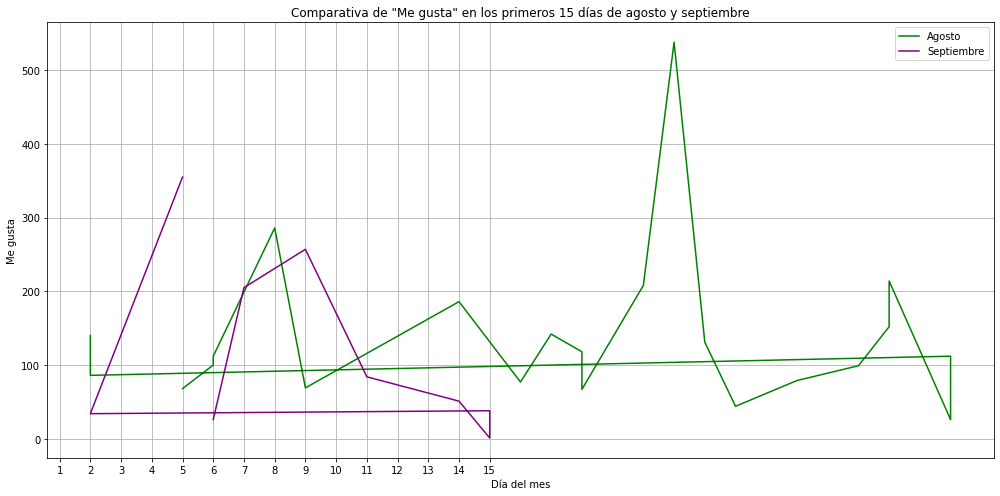

In [ ]:
# Revisar y llenar valores nulos en 'Me gusta'
data_primeros_15_agosto['Me gusta'] = data_primeros_15_agosto['Me gusta'].interpolate()
data_primeros_15_septiembre['Me gusta'] = data_primeros_15_septiembre['Me gusta'].interpolate()

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de 'Me gusta' de agosto en verde
plt.plot(data_primeros_15_agosto['D√≠a'],
         data_primeros_15_agosto['Me gusta'],
         label='Agosto', color='green')

# Graficar los valores de 'Me gusta' de septiembre en morado
plt.plot(data_primeros_15_septiembre['D√≠a'],
         data_primeros_15_septiembre['Me gusta'],
         label='Septiembre', color='purple')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('D√≠a del mes')
plt.ylabel('Me gusta')
plt.title('Comparativa de "Me gusta" en los primeros 15 d√≠as de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))  # Mostrar los d√≠as del 1 al 15 en el eje X
plt.tight_layout()

# Mostrar gr√°fico
plt.show()


In [ ]:
# Mostrar las primeras filas de ambos datasets para inspeccionar los datos
print("Datos de los primeros 15 d√≠as de agosto:")
print(data_primeros_15_agosto.head(15))

print("\nDatos de los primeros 15 d√≠as de septiembre:")
print(data_primeros_15_septiembre.head(15))


Datos de los primeros 15 d√≠as de agosto:
    Identificador de la publicaci√≥n  Identificador de la cuenta  \
0                 17892843947985175           17841402591799685   
1                 18323656753150951           17841411919702656   
2                 18043769962823826           17841402591799685   
3                 18067617517597046           17841402591799685   
4                 18128188972371585           17841402591799685   
5                 18017398763582738           17841402591799685   
6                 18040698574852084           17841402591799685   
7                 18154322095317320           17841402591799685   
8                 18432868675070705           17841400356362656   
9                 18038379134043830           17841402591799685   
10                18067917469605634           17841402591799685   
11                18034301249484347           17841402591799685   
12                18034043570176793           17841402591799685   
13                1

In [ ]:
# Estad√≠sticas descriptivas para la columna 'Me gusta' de ambos datasets
print("\nEstad√≠sticas descriptivas de 'Me gusta' para agosto:")
print(data_primeros_15_agosto['Me gusta'].describe())

print("\nEstad√≠sticas descriptivas de 'Me gusta' para septiembre:")
print(data_primeros_15_septiembre['Me gusta'].describe())



Estad√≠sticas descriptivas de 'Me gusta' para agosto:
count     23.000000
mean     133.956522
std      108.250332
min       26.000000
25%       73.000000
50%      112.000000
75%      147.000000
max      538.000000
Name: Me gusta, dtype: float64

Estad√≠sticas descriptivas de 'Me gusta' para septiembre:
count      9.000000
mean     116.777778
std      124.649286
min        1.000000
25%       34.000000
50%       51.000000
75%      205.000000
max      355.000000
Name: Me gusta, dtype: float64


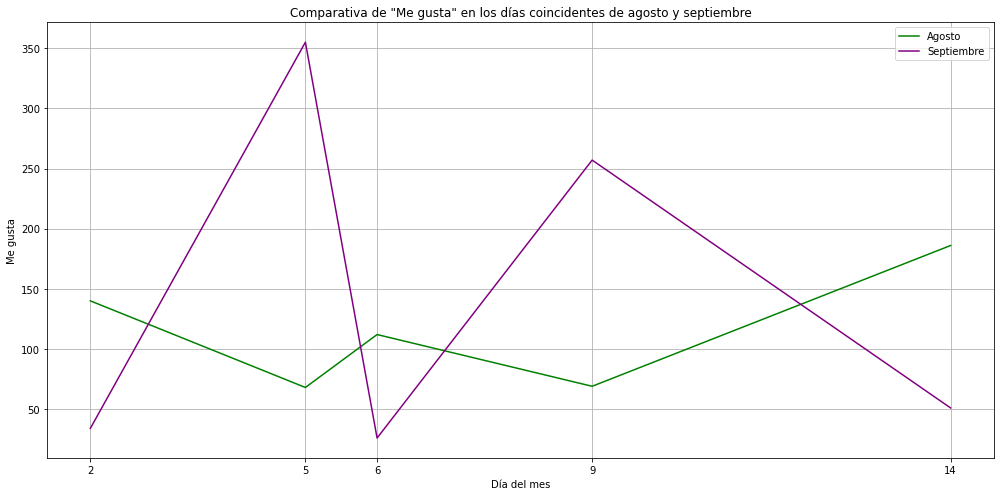

In [ ]:
# Asegurarnos de que la columna 'Hora de publicaci√≥n' est√° en formato datetime
data_primeros_15_agosto['Hora de publicaci√≥n'] = pd.to_datetime(data_primeros_15_agosto['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')
data_primeros_15_septiembre['Hora de publicaci√≥n'] = pd.to_datetime(data_primeros_15_septiembre['Hora de publicaci√≥n'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'D√≠a' extrayendo el d√≠a del mes
data_primeros_15_agosto['D√≠a'] = data_primeros_15_agosto['Hora de publicaci√≥n'].dt.day
data_primeros_15_septiembre['D√≠a'] = data_primeros_15_septiembre['Hora de publicaci√≥n'].dt.day

# Eliminar filas duplicadas basadas en la columna 'D√≠a'
data_primeros_15_agosto = data_primeros_15_agosto.drop_duplicates(subset='D√≠a')
data_primeros_15_septiembre = data_primeros_15_septiembre.drop_duplicates(subset='D√≠a')

# Crear un rango de d√≠as del 1 al 15
dias_completos = range(1, 16)

# Reindexar ambos datasets para tener los d√≠as del 1 al 15, y rellenar con NaN donde falten datos
data_primeros_15_agosto = data_primeros_15_agosto.set_index('D√≠a').reindex(dias_completos).reset_index()
data_primeros_15_septiembre = data_primeros_15_septiembre.set_index('D√≠a').reindex(dias_completos).reset_index()

# Eliminar filas donde ambos datasets no tienen datos (es decir, ambos tienen NaN en el mismo d√≠a)
combined_data = pd.merge(data_primeros_15_agosto[['D√≠a', 'Me gusta']],
                         data_primeros_15_septiembre[['D√≠a', 'Me gusta']],
                         on='D√≠a', suffixes=('_agosto', '_septiembre'))

# Eliminar filas con NaN en ambos meses
combined_data.dropna(subset=['Me gusta_agosto', 'Me gusta_septiembre'], inplace=True)

# Graficar los datos
plt.figure(figsize=(14, 7))

# Graficar los valores de 'Me gusta' de agosto en verde
plt.plot(combined_data['D√≠a'],
         combined_data['Me gusta_agosto'],
         label='Agosto', color='green')

# Graficar los valores de 'Me gusta' de septiembre en morado
plt.plot(combined_data['D√≠a'],
         combined_data['Me gusta_septiembre'],
         label='Septiembre', color='purple')

# A√±adir etiquetas y t√≠tulo
plt.xlabel('D√≠a del mes')
plt.ylabel('Me gusta')
plt.title('Comparativa de "Me gusta" en los d√≠as coincidentes de agosto y septiembre')
plt.legend()
plt.grid(True)
plt.xticks(combined_data['D√≠a'])  # Mostrar solo los d√≠as con datos en ambos meses
plt.tight_layout()

# Mostrar gr√°fico
plt.show()
